In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [133]:
gen_palette = sns.color_palette(["#c1121f", "#669bbc", "#fdf0d5", "#ca6702", "#94d2bd"])  # red & black
sns.set_theme(style="white", context='notebook', font_scale=1.4)
plt.rcParams.update({'font.size': 14})
sns.set_palette(gen_palette)


In [134]:
df = pd.read_csv("./data/final.csv")

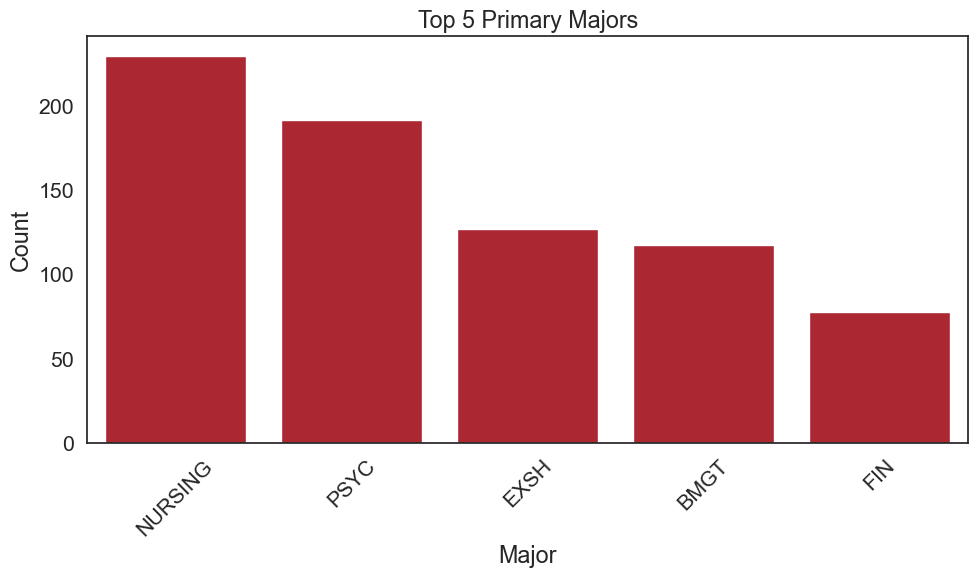

In [135]:
top_majors = df["Recipient Primary Major Abbreviation"].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_majors.index, y=top_majors.values)
ax.set_title(f"Top {5} Primary Majors")
ax.set_xlabel("Major")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

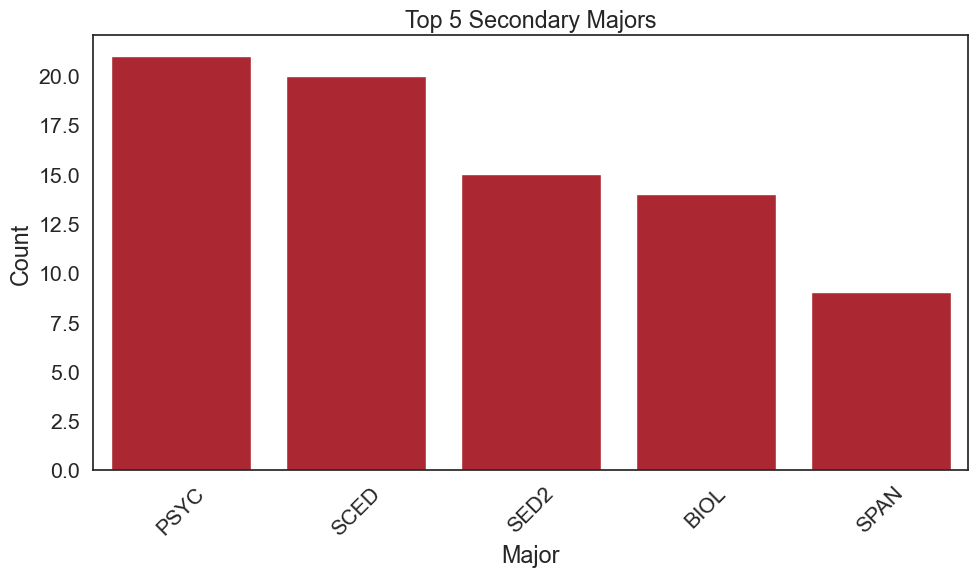

In [136]:
top_majors = df["Recipient Secondary Majors Abbreviation"].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_majors.index, y=top_majors.values)
ax.set_title(f"Top {5} Secondary Majors")
ax.set_xlabel("Major")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


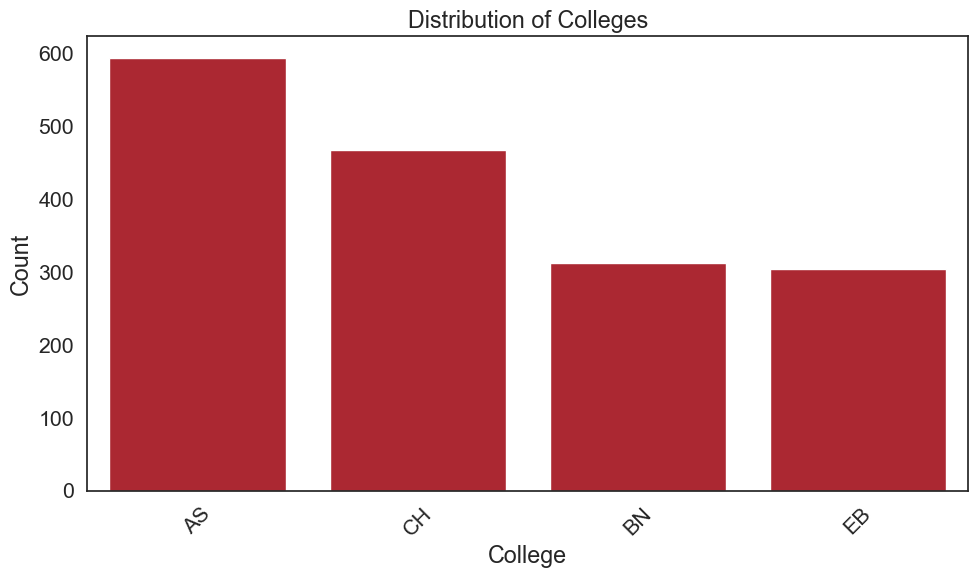

In [152]:
top_majors = df["Recipient Primary College Abbreviation"].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_majors.index, y=top_majors.values)
ax.set_title(f"Distribution of Colleges")
ax.set_xlabel("College")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

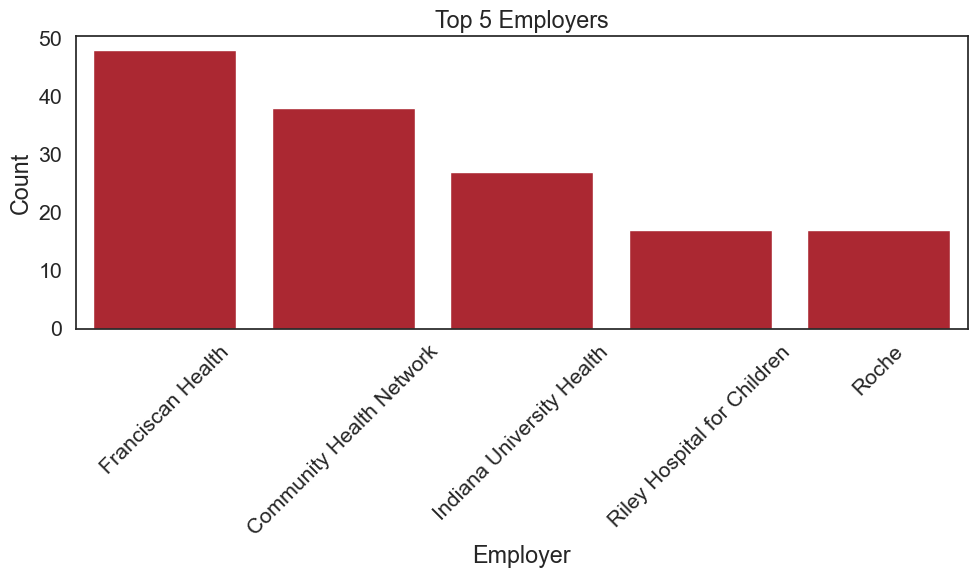

In [153]:
top_majors = df["Employer Name"].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_majors.index, y=top_majors.values)
ax.set_title(f"Top {5} Employers")
ax.set_xlabel("Employer")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

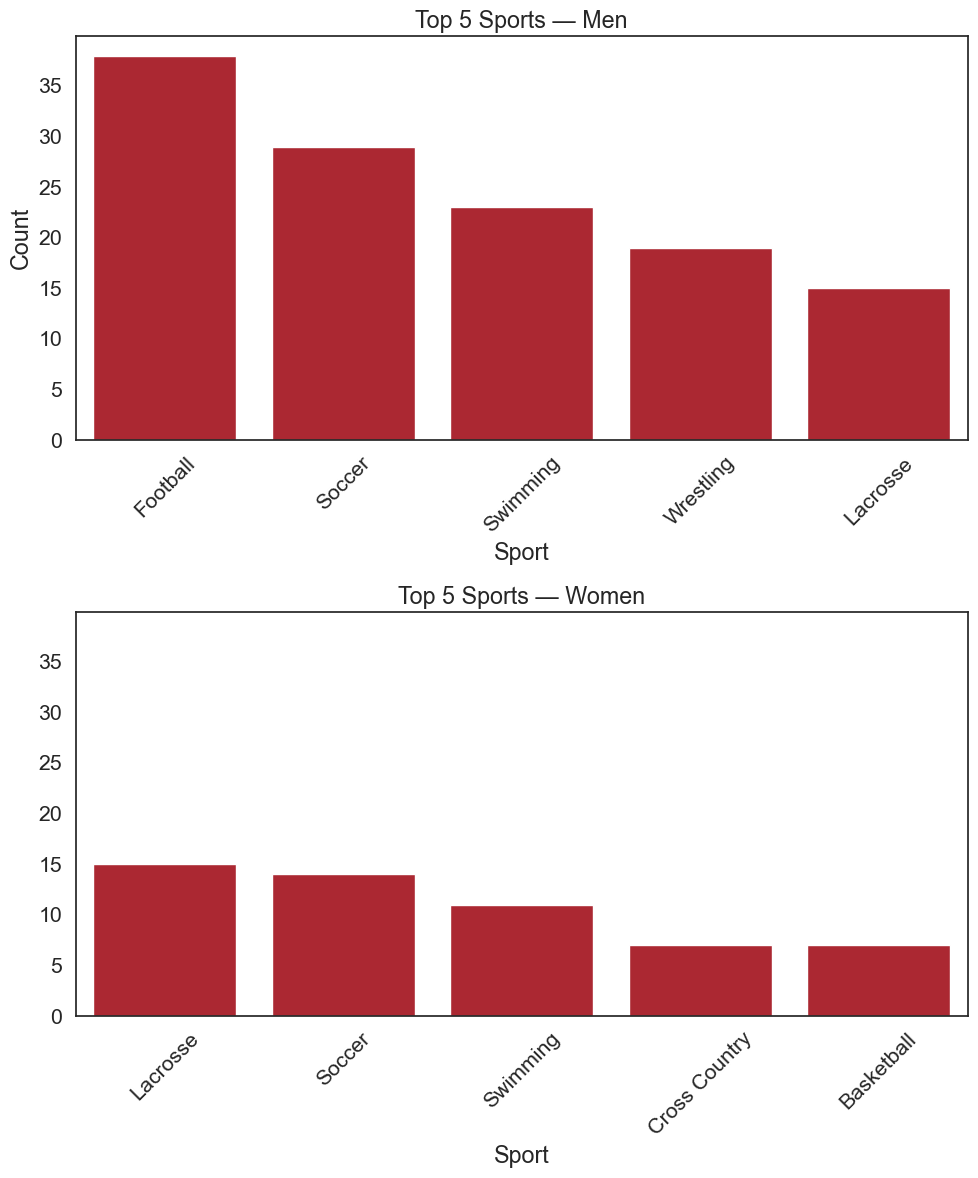

In [156]:
df["Sex"] = df["SPORT_1"].str.extract(r"\((M|W)\)")
df["Sport"] = df["SPORT_1"].str.replace(r"\s*\(M\)|\s*\(W\)", "", regex=True)

# ------------------------------------------------------
# 2. Compute top 5 sports for each sex
# ------------------------------------------------------
top5_m = (
    df[df["Sex"] == "M"]["Sport"]
    .value_counts()
    .head(5)
    .reset_index(name="Count")
    .rename(columns={"index": "Sport"})
)

top5_w = (
    df[df["Sex"] == "W"]["Sport"]
    .value_counts()
    .head(5)
    .reset_index(name="Count")
    .rename(columns={"index": "Sport"})
)

# ------------------------------------------------------
# 3. Create side-by-side subplots
# ------------------------------------------------------
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharey=True)

# ---- Men ----
sns.barplot(
    data=top5_m,
    x="Sport",
    y="Count",
    ax=axes[0],
)
axes[0].set_title("Top 5 Sports — Men")
axes[0].set_xlabel("Sport")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# ---- Women ----
sns.barplot(
    data=top5_w,
    x="Sport",
    y="Count",
    ax=axes[1]
)
axes[1].set_title("Top 5 Sports — Women")
axes[1].set_xlabel("Sport")
axes[1].set_ylabel("")  # shared y-axis
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [164]:
major_counts = (
    df.groupby("Recipient Primary Major Abbreviation")
    .size()
    .reset_index(name="Total_Graduates")
)

# Keep only majors with >15 graduates
eligible_majors = major_counts[major_counts["Total_Graduates"] > 15]

# Filter DF to only those majors
df_eligible = df[
    df["Recipient Primary Major Abbreviation"].isin(
        eligible_majors["Recipient Primary Major Abbreviation"]
    )
]

# -----------------------------
# 2. Count categories per major
# -----------------------------
cat_counts = (
    df_eligible
    .groupby(["Recipient Primary Major Abbreviation", "Outcome Category"])
    .size()
    .reset_index(name="Count")
)

# Pivot so each Outcome Category is a column
cat_pivot = cat_counts.pivot(
    index="Recipient Primary Major Abbreviation",
    columns="Outcome Category",
    values="Count"
).fillna(0)

# Ensure categories exist
for c in ["Positive", "Negative", "Inconclusive"]:
    if c not in cat_pivot.columns:
        cat_pivot[c] = 0

# -----------------------------
# 3. Merge total graduates
# -----------------------------
cat_pivot = cat_pivot.merge(
    eligible_majors,
    on="Recipient Primary Major Abbreviation",
    how="left"
)

# -----------------------------
# 4. Compute percentages ONLY
# -----------------------------
result = pd.DataFrame({
    "Recipient Primary Major Abbreviation": cat_pivot["Recipient Primary Major Abbreviation"],
    "Total_Graduates": cat_pivot["Total_Graduates"],
    "Positive_Pct": cat_pivot["Positive"] / cat_pivot["Total_Graduates"],
    "Negative_Pct": cat_pivot["Negative"] / cat_pivot["Total_Graduates"],
    "Inconclusive_Pct": cat_pivot["Inconclusive"] / cat_pivot["Total_Graduates"]
}).reset_index(drop=True)

# -----------------------------
# 5. Top 5 majors by percent positive
# -----------------------------
top = result.sort_values("Positive_Pct", ascending=False).head(10)

top

,Recipient Primary Major Abbreviation,Total_Graduates,Positive_Pct,Negative_Pct,Inconclusive_Pct
16,MENG,25,1.000000,0.000000,0.000000
0,ACCOUNTING,19,0.947368,0.052632,0.000000
22,RESP,17,0.941176,0.058824,0.000000
10,EXSH,127,0.929134,0.047244,0.023622
3,BSW,46,0.913043,0.086957,0.000000
18,NURSING,230,0.908696,0.078261,0.013043
4,CHEMISTRY,36,0.861111,0.083333,0.055556
19,PHEP,43,0.860465,0.116279,0.023256
11,FIN,78,0.858974,0.128205,0.012821
14,HUMAN BIOLOGY,21,0.857143,0.142857,0.000000


In [139]:
lowest = result.sort_values("Positive_Pct", ascending=False).tail(10)

lowest

,Recipient Primary Major Abbreviation,Total_Graduates,Positive_Pct,Negative_Pct,Inconclusive_Pct
8,ELE2,59,0.711864,0.237288,0.050847
24,SMGT,60,0.700000,0.266667,0.033333
7,CRIM,60,0.700000,0.266667,0.033333
1,BIOLOGY,66,0.696970,0.227273,0.075758
20,PSCI,23,0.695652,0.304348,0.000000
9,ENLS,16,0.687500,0.312500,0.000000
5,COMMUNICATION,53,0.641509,0.339623,0.018868
13,HIMA,21,0.571429,0.428571,0.000000
12,GENS,28,0.535714,0.321429,0.142857
6,COMPUTER SCIENCE,18,0.333333,0.611111,0.055556


In [165]:
major_counts = (
    df.groupby("Recipient Primary Major Abbreviation")
    .size()
    .reset_index(name="Total_Graduates")
)

# Keep only majors with >15 graduates
eligible_majors = major_counts

# Filter DF to only those majors
df_eligible = df[
    df["Recipient Primary Major Abbreviation"].isin(
        eligible_majors["Recipient Primary Major Abbreviation"]
    )
]

# -----------------------------
# 2. Count categories per major
# -----------------------------
cat_counts = (
    df_eligible
    .groupby(["Recipient Primary Major Abbreviation", "Outcome Category"])
    .size()
    .reset_index(name="Count")
)

# Pivot so each Outcome Category is a column
cat_pivot = cat_counts.pivot(
    index="Recipient Primary Major Abbreviation",
    columns="Outcome Category",
    values="Count"
).fillna(0)

# Ensure categories exist
for c in ["Positive", "Negative", "Inconclusive"]:
    if c not in cat_pivot.columns:
        cat_pivot[c] = 0

# -----------------------------
# 3. Merge total graduates
# -----------------------------
cat_pivot = cat_pivot.merge(
    eligible_majors,
    on="Recipient Primary Major Abbreviation",
    how="left"
)

# -----------------------------
# 4. Compute percentages ONLY
# -----------------------------
result = pd.DataFrame({
    "Recipient Primary Major Abbreviation": cat_pivot["Recipient Primary Major Abbreviation"],
    "Total_Graduates": cat_pivot["Total_Graduates"],
    "Positive_Pct": cat_pivot["Positive"] / cat_pivot["Total_Graduates"],
    "Negative_Pct": cat_pivot["Negative"] / cat_pivot["Total_Graduates"],
    "Inconclusive_Pct": cat_pivot["Inconclusive"] / cat_pivot["Total_Graduates"]
}).reset_index(drop=True)

# -----------------------------
# 5. Top 5 majors by percent positive
# -----------------------------
result.sort_values("Positive_Pct", ascending=False).to_csv("results_by_major.csv", index=False)
lowest = result.sort_values("Positive_Pct", ascending=False).tail(10)

lowest

,Recipient Primary Major Abbreviation,Total_Graduates,Positive_Pct,Negative_Pct,Inconclusive_Pct
37,LBST,4,0.500000,0.500000,0.000000
63,SUST,8,0.500000,0.375000,0.125000
23,ESCI,9,0.444444,0.555556,0.000000
66,VCD,15,0.400000,0.600000,0.000000
36,K-12,10,0.400000,0.600000,0.000000
35,ISEN,5,0.400000,0.400000,0.200000
12,COMPUTER SCIENCE,18,0.333333,0.611111,0.055556
27,GART,7,0.285714,0.571429,0.142857
64,SWEN,4,0.250000,0.750000,0.000000
46,MUSJ,2,0.000000,1.000000,0.000000


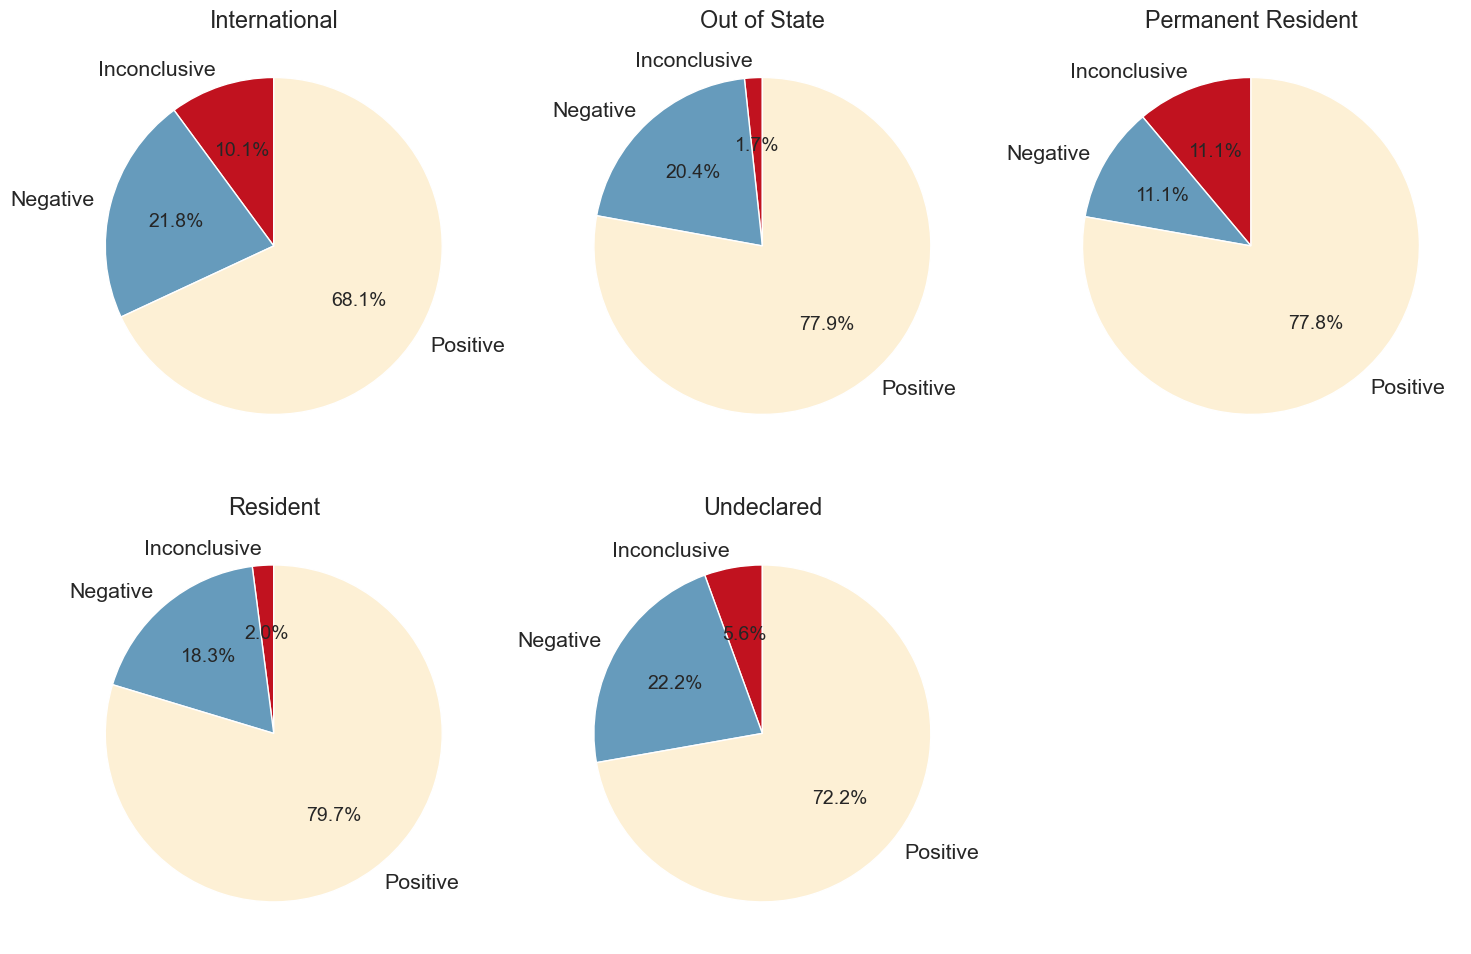

In [141]:
ct = (
    df.groupby(['RESIDENCY', 'Outcome Category'])
    .size()
    .unstack(fill_value=0)
)

residencies = ct.index
outcomes = ct.columns

# ---- Create subplots ----
num = len(residencies)
cols = 3
rows = (num + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))

for i, residency in enumerate(residencies):
    plt.subplot(rows, cols, i + 1)
    values = ct.loc[residency]

    plt.pie(
        values,
        labels=outcomes,
        autopct='%1.1f%%',
        startangle=90
    )

    plt.title(str(residency))

plt.tight_layout()
plt.show()

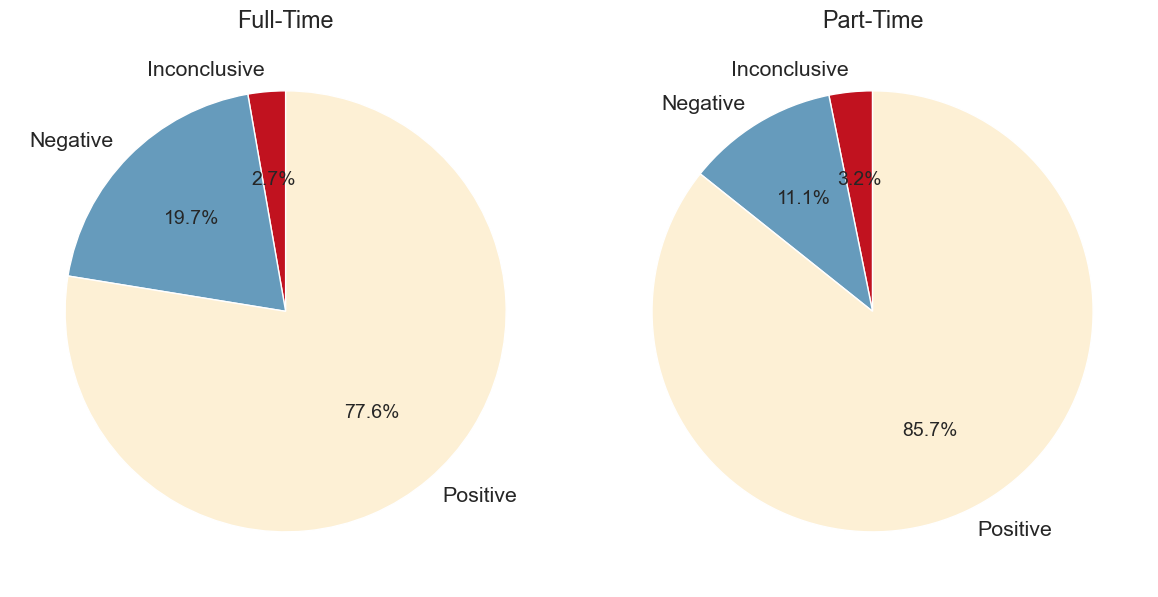

In [142]:
ct = (
    df.groupby(['FTPT', 'Outcome Category'])
    .size()
    .unstack(fill_value=0)
)

ftpt_groups = ct.index
outcomes = ct.columns

# ---- Create subplots ----
num = len(ftpt_groups)
cols = num  # only a few groups, so put them side-by-side
rows = 1

plt.figure(figsize=(6 * num, 6))

for i, group in enumerate(ftpt_groups):
    plt.subplot(rows, cols, i + 1)
    values = ct.loc[group]

    plt.pie(
        values,
        labels=outcomes,
        autopct='%1.1f%%',
        startangle=90
    )

    plt.title(str(group))

plt.tight_layout()
plt.show()

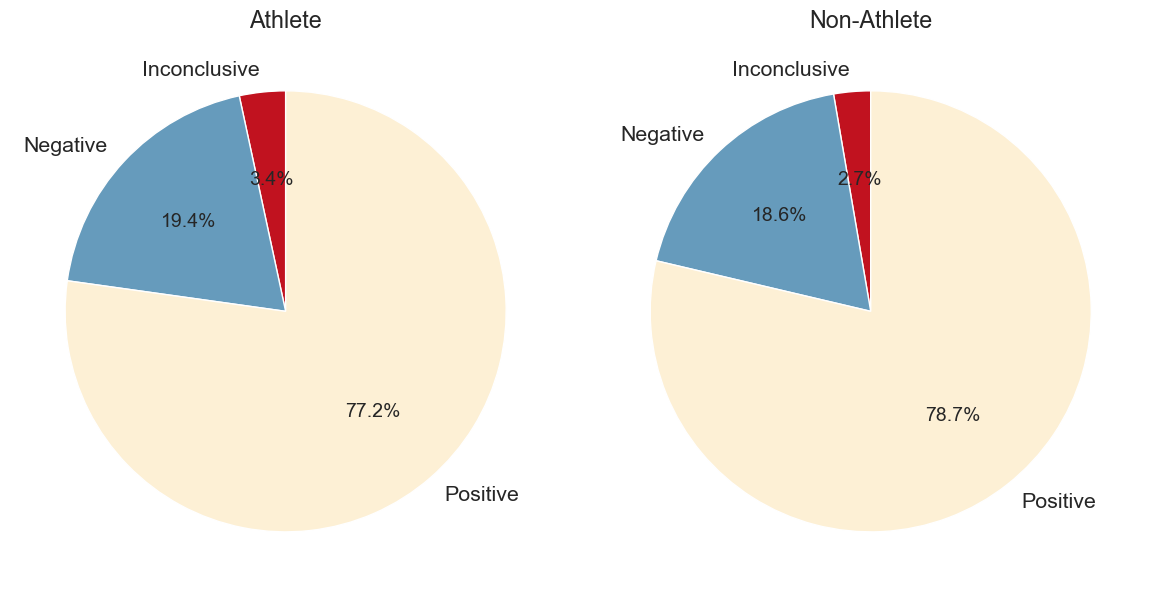

In [143]:
df['Athlete'] = df['SPORT_1'].notna() & (df['SPORT_1'].str.strip() != "")
df['Athlete'] = df['Athlete'].map({True: 'Athlete', False: 'Non-Athlete'})

# Count outcome categories for athletes vs non-athletes
ct = (
    df.groupby(['Athlete', 'Outcome Category'])
    .size()
    .unstack(fill_value=0)
)

groups = ct.index
outcomes = ct.columns

# --- Create subplots ---
num = len(groups)
cols = num  # likely 2 (Athlete / Non-Athlete)
rows = 1

plt.figure(figsize=(6 * num, 6))

for i, grp in enumerate(groups):
    plt.subplot(rows, cols, i + 1)
    values = ct.loc[grp]

    plt.pie(
        values,
        labels=outcomes,
        autopct='%1.1f%%',
        startangle=90
    )

    plt.title(str(grp))

plt.tight_layout()
plt.show()

In [144]:
df.columns

Index(['Random Identifier', 'Recipient Primary Major',
       'Recipient Secondary Majors', 'Recipient Graduation Date',
       'Recipient Primary College', 'Recipient Graduation Group Name',
       'Response Date', 'Outcome', 'Employer Name', 'Employer Industry',
       'Employment Type', 'Job Function', 'Job Position',
       'Found through Handshake', 'Employed During Education', 'Internship',
       'Continuing Education School', 'Continuing Education Level',
       'Continuing Education Major', 'Still Looking Option',
       'Not Seeking Option', 'Location', 'Offer Date', 'Accept Date',
       'Start Date', 'Annual Salary', 'Pay Schedule', 'Bonus Amount',
       'Other Compensation', 'Knowledge Response?',
       '922242: Did you participate in a Work Based Experience while attending UIndy?',
       '922243: Please list the name of the employer(s) / organization(s) for which you participated in Experiential Learning.  (Skip this question if you answered "None of the Above" to the 

Original dataset size: 1682
Filtered dataset size: 1635
Outcome distribution:
Outcome Category
Positive    1320
Negative     315
Name: count, dtype: int64

Analyzing 8 features
Features: ['Recipient Primary Major', 'Recipient Secondary Majors', 'YearSeason', 'Recipient Primary College', 'Sport', 'RESIDENCY', 'FTPT', 'Sex']

FEATURE IMPORTANCE ANALYSIS FOR OUTCOME CATEGORY PREDICTION

1. DATA PREPROCESSING
--------------------------------------------------------------------------------
Numeric features: 1
Categorical features: 7

2. CORRELATION ANALYSIS (Numeric Features)
--------------------------------------------------------------------------------

Top 10 Numeric Features by Absolute Correlation:
   Feature  Correlation  P-value Significant
YearSeason     0.053626 0.030137         Yes


3. CHI-SQUARE TEST (Categorical Features)
--------------------------------------------------------------------------------

Top 15 Categorical Features by Cramér's V (effect size):
                  

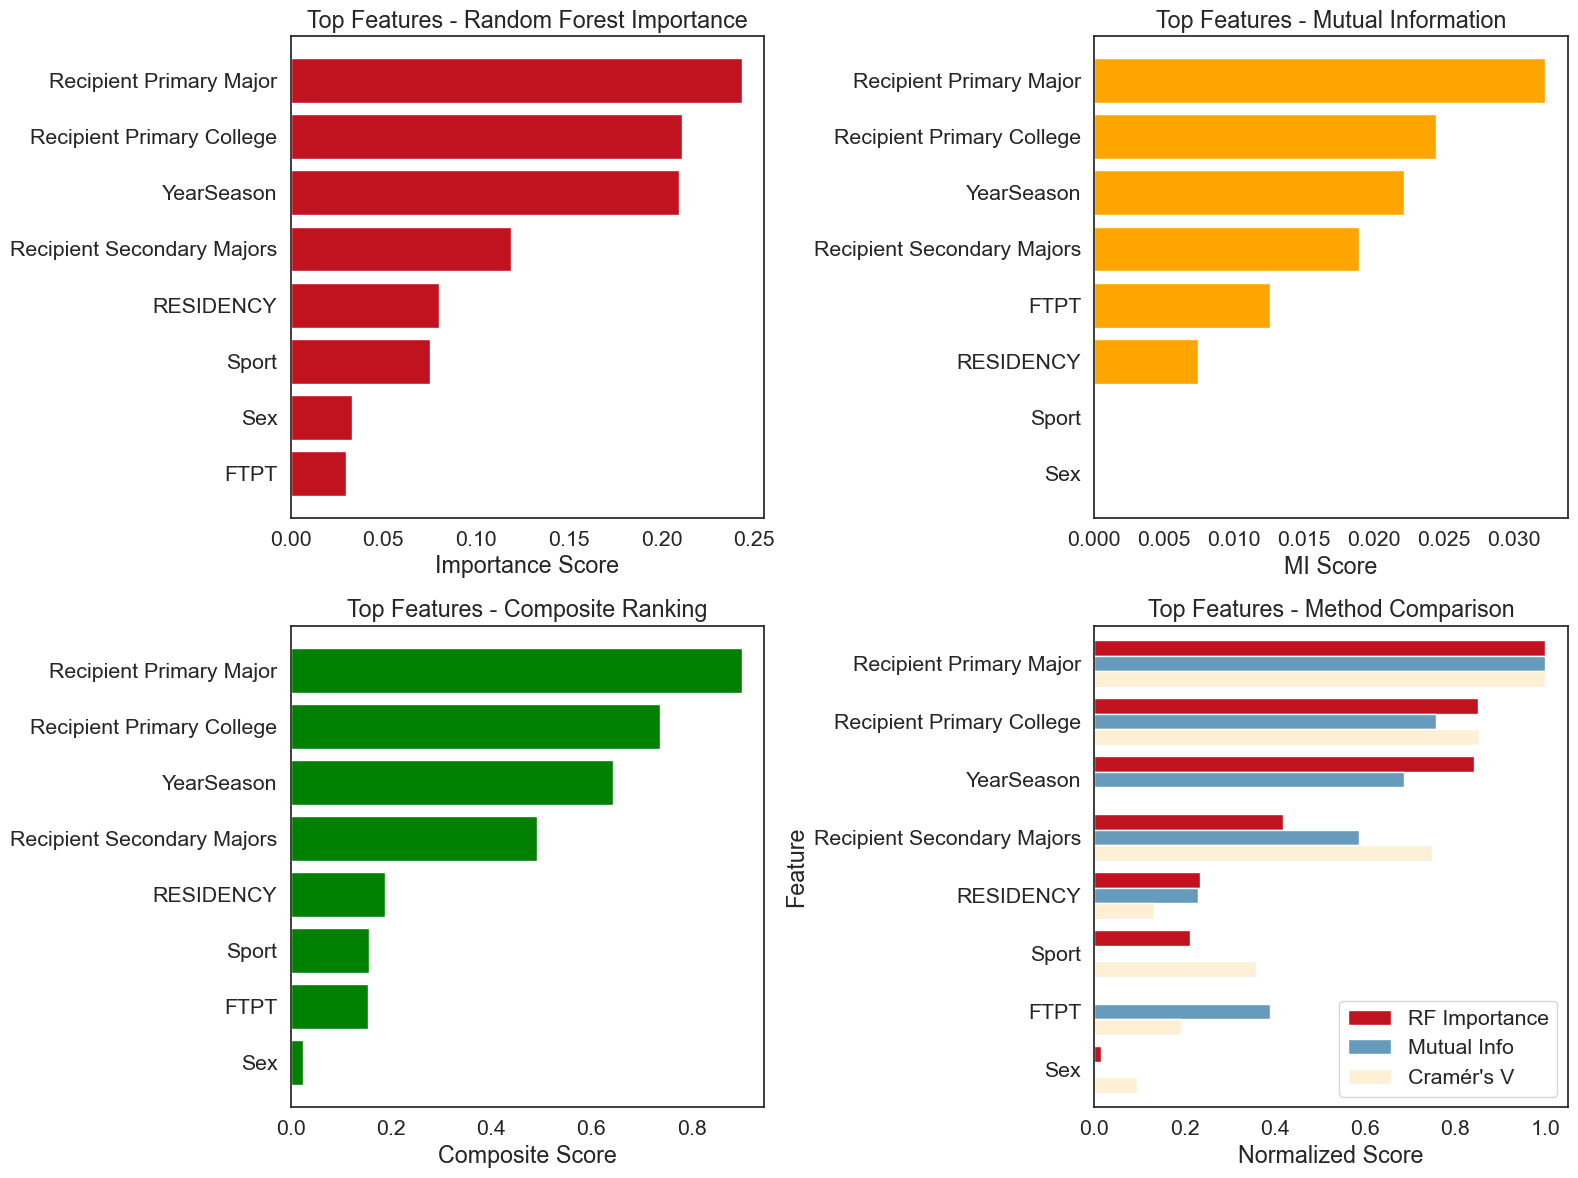



SUMMARY AND RECOMMENDATIONS

🎯 MOST IMPORTANT FEATURES:
   1. Recipient Primary Major
   2. Recipient Primary College
   3. YearSeason
   4. Recipient Secondary Majors
   5. RESIDENCY
   6. Sport
   7. FTPT
   8. Sex

📊 KEY INSIGHTS:
   • Total features analyzed: 8
   • Features with high predictive power (composite score > 0.5): 3
   • Model test accuracy: 79.82%

💡 RECOMMENDATIONS:
   1. Focus on the top 10-15 features for model development
   2. Consider feature engineering for highly important categorical variables
   3. Investigate relationships between top features for potential interactions
   4. Remove features with composite score < 0.1 to reduce dimensionality

✅ Analysis complete!


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency, pointbiserialr
import warnings

warnings.filterwarnings('ignore')

# Assuming your dataframe is named 'df'
# df = pd.read_csv('your_data.csv')

# ============================================================================
# CONFIGURATION: Specify which columns to analyze
# ============================================================================

COLUMNS_TO_ANALYZE = [
    'Recipient Primary Major',
    'Recipient Secondary Majors',
    'YearSeason',
    'Recipient Primary College',
    'Sport',
    'RESIDENCY',
    'FTPT',
    'Sex'
]

# Option 3: Use a pattern to select columns (uncomment and modify as needed)
# COLUMNS_TO_ANALYZE = [col for col in df.columns if 'Recipient' in col or 'Employer' in col]

# Columns to always exclude from analysis
EXCLUDE_COLS = ['Random Identifier', 'Outcome', 'Outcome Category', 'Outcome Group']

# ============================================================================

# Filter for Positive and Negative outcomes only
df_filtered = df[df['Outcome Category'].isin(['Positive', 'Negative'])].copy()

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size: {len(df_filtered)}")
print(f"Outcome distribution:\n{df_filtered['Outcome Category'].value_counts()}\n")

# Separate features and target
target = 'Outcome Category'

# Determine which columns to use
if COLUMNS_TO_ANALYZE is None:
    # Use all columns except excluded ones
    feature_cols = [col for col in df_filtered.columns if col not in EXCLUDE_COLS]
else:
    # Use only specified columns (but still exclude the excluded ones)
    feature_cols = [col for col in COLUMNS_TO_ANALYZE
                    if col in df_filtered.columns and col not in EXCLUDE_COLS]

print(f"Analyzing {len(feature_cols)} features")
print(f"Features: {feature_cols[:10]}..." if len(feature_cols) > 10 else f"Features: {feature_cols}\n")

X = df_filtered[feature_cols].copy()
y = df_filtered[target].copy()

# Encode target variable
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print("=" * 80)
print("FEATURE IMPORTANCE ANALYSIS FOR OUTCOME CATEGORY PREDICTION")
print("=" * 80)

# ============================================================================
# 1. PREPROCESSING: Handle different data types
# ============================================================================
print("\n1. DATA PREPROCESSING")
print("-" * 80)

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Handle missing values
X_processed = X.copy()

# For numeric: fill with median
for col in numeric_features:
    X_processed[col].fillna(X_processed[col].median(), inplace=True)

# For categorical: fill with 'Missing' and encode
label_encoders = {}
for col in categorical_features:
    X_processed[col].fillna('Missing', inplace=True)
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X_processed[col].astype(str))
    label_encoders[col] = le

# ============================================================================
# 2. CORRELATION ANALYSIS (for numeric features)
# ============================================================================
print("\n2. CORRELATION ANALYSIS (Numeric Features)")
print("-" * 80)

if len(numeric_features) > 0:
    correlations = []
    for col in numeric_features:
        # Point-biserial correlation for numeric vs binary categorical
        valid_mask = ~X_processed[col].isna()
        if valid_mask.sum() > 0:
            corr, p_val = pointbiserialr(y_encoded[valid_mask],
                                         X_processed[col][valid_mask])
            correlations.append({
                'Feature': col,
                'Correlation': abs(corr),
                'P-value': p_val,
                'Significant': 'Yes' if p_val < 0.05 else 'No'
            })

    corr_df = pd.DataFrame(correlations).sort_values('Correlation', ascending=False)
    print("\nTop 10 Numeric Features by Absolute Correlation:")
    print(corr_df.head(10).to_string(index=False))

# ============================================================================
# 3. CHI-SQUARE TEST (for categorical features)
# ============================================================================
print("\n\n3. CHI-SQUARE TEST (Categorical Features)")
print("-" * 80)

if len(categorical_features) > 0:
    chi_scores = []
    for col in categorical_features:
        contingency_table = pd.crosstab(X_processed[col], y_encoded)
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

        # Cramér's V for effect size
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0

        chi_scores.append({
            'Feature': col,
            'Chi2_Statistic': chi2_stat,
            'P-value': p_val,
            'Cramers_V': cramers_v,
            'Significant': 'Yes' if p_val < 0.05 else 'No'
        })

    chi_df = pd.DataFrame(chi_scores).sort_values('Cramers_V', ascending=False)
    print("\nTop 15 Categorical Features by Cramér's V (effect size):")
    print(chi_df.head(15).to_string(index=False))

# ============================================================================
# 4. MUTUAL INFORMATION
# ============================================================================
print("\n\n4. MUTUAL INFORMATION ANALYSIS")
print("-" * 80)

mi_scores = mutual_info_classif(X_processed, y_encoded, random_state=42)
mi_df = pd.DataFrame({
    'Feature': feature_cols,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("\nTop 20 Features by Mutual Information:")
print(mi_df.head(20).to_string(index=False))

# ============================================================================
# 5. RANDOM FOREST FEATURE IMPORTANCE
# ============================================================================
print("\n\n5. RANDOM FOREST FEATURE IMPORTANCE")
print("-" * 80)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_depth=10, min_samples_split=20)
rf_model.fit(X_train, y_train)

# Get feature importances
rf_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 20 Features by Random Forest Importance:")
print(rf_importance.head(20).to_string(index=False))

# Model performance
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f"\nModel Accuracy - Train: {train_score:.4f}, Test: {test_score:.4f}")

# ============================================================================
# 6. COMBINED RANKING
# ============================================================================
print("\n\n6. COMBINED FEATURE IMPORTANCE RANKING")
print("-" * 80)


# Normalize all scores to 0-1 range
def normalize_scores(df, score_col):
    df = df.copy()
    min_val = df[score_col].min()
    max_val = df[score_col].max()
    if max_val > min_val:
        df[f'{score_col}_normalized'] = (df[score_col] - min_val) / (max_val - min_val)
    else:
        df[f'{score_col}_normalized'] = 0
    return df


# Merge all scores
combined = rf_importance[['Feature', 'Importance']].copy()
combined = combined.merge(mi_df[['Feature', 'MI_Score']], on='Feature', how='left')

# Add chi-square for categorical features
if len(categorical_features) > 0:
    combined = combined.merge(chi_df[['Feature', 'Cramers_V']], on='Feature', how='left')
    combined['Cramers_V'].fillna(0, inplace=True)
else:
    combined['Cramers_V'] = 0

# Add correlation for numeric features
if len(numeric_features) > 0:
    combined = combined.merge(corr_df[['Feature', 'Correlation']], on='Feature', how='left')
    combined['Correlation'].fillna(0, inplace=True)
else:
    combined['Correlation'] = 0

# Normalize all scores
combined = normalize_scores(combined, 'Importance')
combined = normalize_scores(combined, 'MI_Score')
combined = normalize_scores(combined, 'Cramers_V')
combined = normalize_scores(combined, 'Correlation')

# Calculate composite score (weighted average)
combined['Composite_Score'] = (
        0.40 * combined['Importance_normalized'] +
        0.30 * combined['MI_Score_normalized'] +
        0.20 * combined['Cramers_V_normalized'] +
        0.10 * combined['Correlation_normalized']
)

combined_sorted = combined.sort_values('Composite_Score', ascending=False)

print("\nTop Features by Composite Score:")
print(combined_sorted[['Feature', 'Composite_Score', 'Importance',
                       'MI_Score', 'Cramers_V', 'Correlation']].head(25).to_string(index=False))

# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================
print("\n\n7. GENERATING VISUALIZATIONS")
print("-" * 80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 Random Forest Importance
ax1 = axes[0, 0]
top_rf = rf_importance.head(15)
ax1.barh(range(len(top_rf)), top_rf['Importance'])
ax1.set_yticks(range(len(top_rf)))
ax1.set_yticklabels(top_rf['Feature'])
ax1.set_xlabel('Importance Score')
ax1.set_title('Top Features - Random Forest Importance')
ax1.invert_yaxis()

# Plot 2: Top 15 Mutual Information
ax2 = axes[0, 1]
top_mi = mi_df.head(15)
ax2.barh(range(len(top_mi)), top_mi['MI_Score'], color='orange')
ax2.set_yticks(range(len(top_mi)))
ax2.set_yticklabels(top_mi['Feature'])
ax2.set_xlabel('MI Score')
ax2.set_title('Top Features - Mutual Information')
ax2.invert_yaxis()

# Plot 3: Top 15 Composite Score
ax3 = axes[1, 0]
top_composite = combined_sorted.head(15)
ax3.barh(range(len(top_composite)), top_composite['Composite_Score'], color='green')
ax3.set_yticks(range(len(top_composite)))
ax3.set_yticklabels(top_composite['Feature'])
ax3.set_xlabel('Composite Score')
ax3.set_title('Top Features - Composite Ranking')
ax3.invert_yaxis()

# Plot 4: Comparison of top 10 across methods
ax4 = axes[1, 1]
top_n = 10
comparison_data = combined_sorted.head(top_n)[['Feature', 'Importance_normalized',
                                               'MI_Score_normalized',
                                               'Cramers_V_normalized']].set_index('Feature')
comparison_data.plot(kind='barh', ax=ax4, width=0.8)
ax4.set_xlabel('Normalized Score')
ax4.set_title(f'Top Features - Method Comparison')
ax4.legend(['RF Importance', 'Mutual Info', 'Cramér\'s V'], loc='lower right')
ax4.invert_yaxis()

plt.tight_layout()
plt.savefig('feature_importance_analysis.png', dpi=300, bbox_inches='tight')
print("Visualization saved as 'feature_importance_analysis.png'")
plt.show()

# ============================================================================
# 8. SUMMARY AND RECOMMENDATIONS
# ============================================================================
print("\n\n" + "=" * 80)
print("SUMMARY AND RECOMMENDATIONS")
print("=" * 80)

top_10_features = combined_sorted.head(10)['Feature'].tolist()

print("\n🎯 MOST IMPORTANT FEATURES:")
for i, feat in enumerate(top_10_features, 1):
    print(f"   {i}. {feat}")

print("\n📊 KEY INSIGHTS:")
print(f"   • Total features analyzed: {len(feature_cols)}")
print(f"   • Features with high predictive power (composite score > 0.5): "
      f"{len(combined_sorted[combined_sorted['Composite_Score'] > 0.5])}")
print(f"   • Model test accuracy: {test_score:.2%}")

print("\n💡 RECOMMENDATIONS:")
print("   1. Focus on the top 10-15 features for model development")
print("   2. Consider feature engineering for highly important categorical variables")
print("   3. Investigate relationships between top features for potential interactions")
print("   4. Remove features with composite score < 0.1 to reduce dimensionality")

print("\n✅ Analysis complete!")
print("=" * 80)

STATISTICAL SIGNIFICANCE TEST
Research Question: Does playing a sport affect outcome category?

1. DATA PREPARATION
--------------------------------------------------------------------------------
Total observations: 1635

Athlete distribution:
Athlete
Non-Athlete    1406
Athlete         229
Name: count, dtype: int64

Outcome Category distribution:
Outcome Category
Positive    1320
Negative     315
Name: count, dtype: int64


2. DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------

Contingency Table (Counts):
Outcome Category  Negative  Positive
Athlete                             
Athlete                 46       183
Non-Athlete            269      1137

Contingency Table with Totals:
Outcome Category  Negative  Positive   All
Athlete                                   
Athlete                 46       183   229
Non-Athlete            269      1137  1406
All                    315      1320  1635

Percentage Distribution (by Athlete St

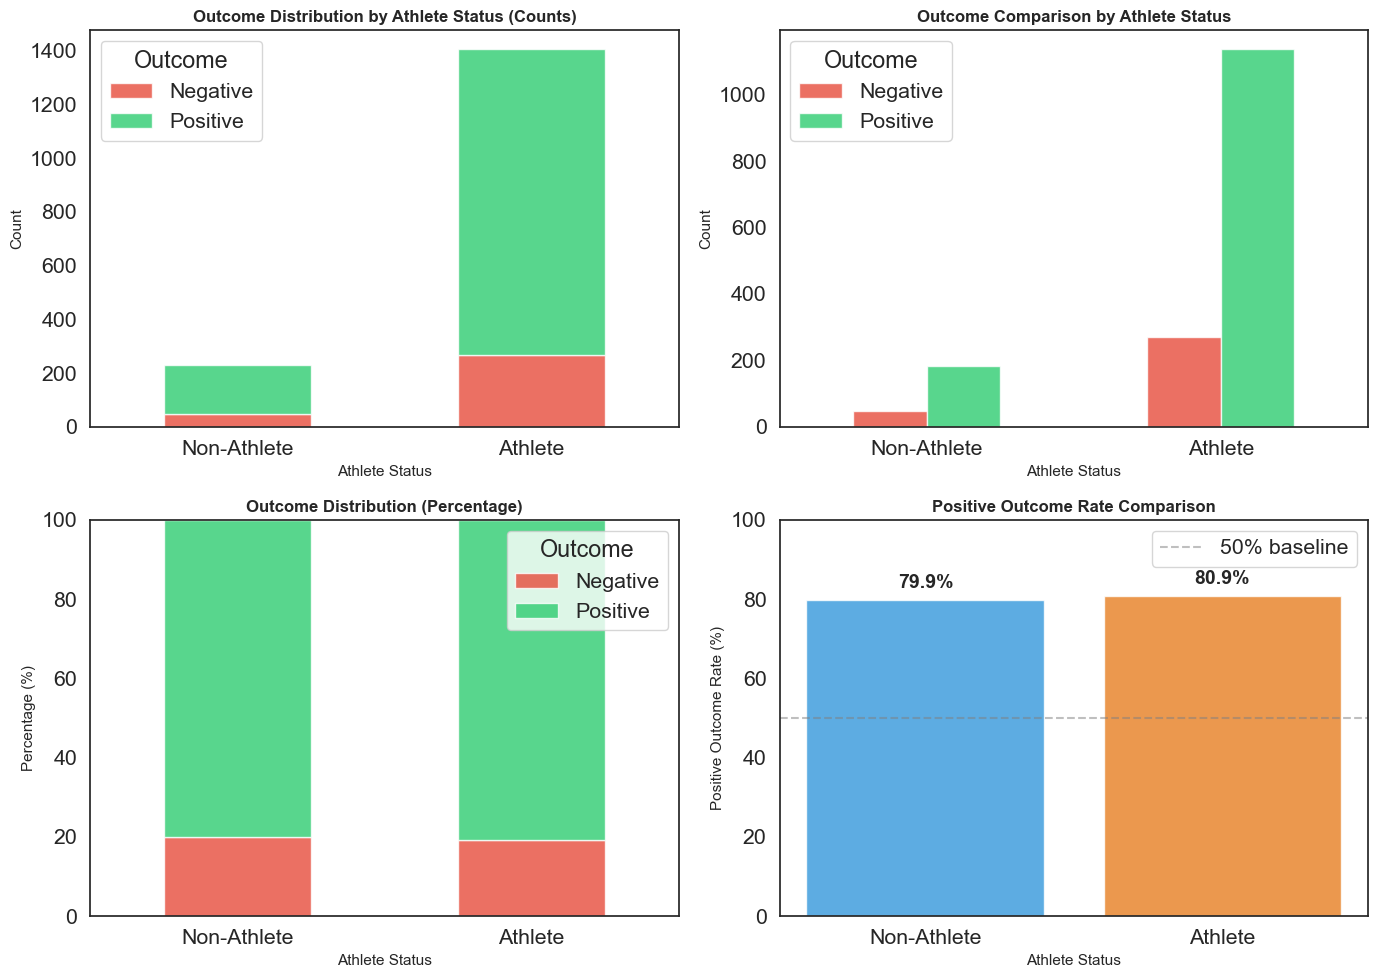



FINAL SUMMARY AND CONCLUSION

📊 Sample Size: n = 1635
   - Athletes: 0 (0.0%)
   - Non-Athletes: 0 (0.0%)

📈 Key Findings:
   - Chi-square statistic: 0.0622
   - P-value: 0.802990
   - Effect size (Cramér's V): 0.0062 (NEGLIGIBLE (< 0.1))
   - Odds Ratio: 1.0625 (95% CI: 0.7491-1.5070)
   - Relative Risk: 1.0120 (95% CI: 0.9438-1.0850)

🎯 Statistical Conclusion:
   ✗ There is NO statistically significant relationship between playing
     a sport and outcome category (p = 0.8030)
   → We cannot conclude that being an athlete affects outcomes

Analysis Complete!


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, fisher_exact
import warnings

warnings.filterwarnings('ignore')

# Assuming your dataframe is named 'df'
# df = pd.read_csv('your_data.csv')

print("=" * 80)
print("STATISTICAL SIGNIFICANCE TEST")
print("Research Question: Does playing a sport affect outcome category?")
print("=" * 80)

# ============================================================================
# 1. DATA PREPARATION
# ============================================================================
print("\n1. DATA PREPARATION")
print("-" * 80)

# Filter for Positive and Negative outcomes only
df_filtered = df[df['Outcome Category'].isin(['Positive', 'Negative'])].copy()

# Check if Athlete column exists
if 'Athlete' not in df_filtered.columns:
    print("ERROR: 'Athlete' column not found in dataset!")
    print("Available columns:", df_filtered.columns.tolist())
else:
    # Create analysis dataset
    analysis_df = df_filtered[['Athlete', 'Outcome Category']].copy()

    # Remove missing values
    analysis_df = analysis_df.dropna()

    print(f"Total observations: {len(analysis_df)}")
    print(f"\nAthlete distribution:")
    print(analysis_df['Athlete'].value_counts())
    print(f"\nOutcome Category distribution:")
    print(analysis_df['Outcome Category'].value_counts())

    # ========================================================================
    # 2. DESCRIPTIVE STATISTICS
    # ========================================================================
    print("\n\n2. DESCRIPTIVE STATISTICS")
    print("-" * 80)

    # Contingency table (counts)
    contingency = pd.crosstab(analysis_df['Athlete'],
                              analysis_df['Outcome Category'])

    print("\nContingency Table (Counts):")
    print(contingency)
    print()

    # Add totals
    contingency_totals = pd.crosstab(analysis_df['Athlete'],
                                     analysis_df['Outcome Category'],
                                     margins=True)
    print("Contingency Table with Totals:")
    print(contingency_totals)
    print()

    # Percentage by row (by athlete status)
    pct_by_athlete = pd.crosstab(analysis_df['Athlete'],
                                 analysis_df['Outcome Category'],
                                 normalize='index') * 100

    print("Percentage Distribution (by Athlete Status):")
    print(pct_by_athlete.round(2))
    print()

    # Summary statistics
    print("Summary by Group:")
    for athlete_status in sorted(analysis_df['Athlete'].unique()):
        subset = analysis_df[analysis_df['Athlete'] == athlete_status]
        n = len(subset)
        n_positive = len(subset[subset['Outcome Category'] == 'Positive'])
        pct_positive = (n_positive / n) * 100

        athlete_label = "Athletes" if athlete_status == 1 else "Non-Athletes"
        print(f"\n  {athlete_label} (n={n}):")
        print(f"    - Positive outcomes: {n_positive} ({pct_positive:.2f}%)")
        print(f"    - Negative outcomes: {n - n_positive} ({100 - pct_positive:.2f}%)")

    # ========================================================================
    # 3. CHI-SQUARE TEST OF INDEPENDENCE
    # ========================================================================
    print("\n\n3. CHI-SQUARE TEST OF INDEPENDENCE")
    print("-" * 80)
    print("Null Hypothesis (H0): Playing a sport and outcome category are independent")
    print("Alternative Hypothesis (H1): Playing a sport and outcome category are related")

    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency)

    print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_value:.6f}")

    print("\nExpected Frequencies (if independent):")
    expected_df = pd.DataFrame(expected_freq,
                               index=contingency.index,
                               columns=contingency.columns)
    print(expected_df.round(2))

    # Check assumptions
    print("\nAssumption Check:")
    min_expected = expected_freq.min()
    print(f"  - Minimum expected frequency: {min_expected:.2f}")
    if min_expected >= 5:
        print("  ✓ Chi-square test is appropriate (all expected frequencies ≥ 5)")
    else:
        print("  ⚠ Warning: Some expected frequencies < 5. Consider Fisher's Exact Test.")

    # Interpretation
    print("\nStatistical Significance:")
    alpha = 0.05
    if p_value < 0.001:
        print(f"  *** p < 0.001: HIGHLY SIGNIFICANT")
        print(f"  Result: REJECT H0 at α = {alpha}")
        print("  Conclusion: Strong evidence that playing a sport is associated with outcome category")
    elif p_value < 0.01:
        print(f"  ** p < 0.01: VERY SIGNIFICANT")
        print(f"  Result: REJECT H0 at α = {alpha}")
        print("  Conclusion: Very strong evidence that playing a sport is associated with outcome category")
    elif p_value < 0.05:
        print(f"  * p < 0.05: SIGNIFICANT")
        print(f"  Result: REJECT H0 at α = {alpha}")
        print("  Conclusion: Evidence that playing a sport is associated with outcome category")
    else:
        print(f"  p ≥ 0.05: NOT SIGNIFICANT")
        print(f"  Result: FAIL TO REJECT H0 at α = {alpha}")
        print("  Conclusion: Insufficient evidence that playing a sport affects outcome category")

    # ========================================================================
    # 4. EFFECT SIZE (CRAMÉR'S V)
    # ========================================================================
    print("\n\n4. EFFECT SIZE ANALYSIS")
    print("-" * 80)

    n = contingency.sum().sum()
    min_dim = min(contingency.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0

    print(f"Cramér's V: {cramers_v:.4f}")
    print("\nInterpretation (Cohen's guidelines for 1 df):")
    if cramers_v < 0.1:
        effect_interpretation = "NEGLIGIBLE (< 0.1)"
    elif cramers_v < 0.3:
        effect_interpretation = "SMALL (0.1 - 0.3)"
    elif cramers_v < 0.5:
        effect_interpretation = "MEDIUM (0.3 - 0.5)"
    else:
        effect_interpretation = "LARGE (≥ 0.5)"

    print(f"  Effect Size: {effect_interpretation}")

    # ========================================================================
    # 5. ODDS RATIO AND RELATIVE RISK
    # ========================================================================
    print("\n\n5. ODDS RATIO AND RELATIVE RISK")
    print("-" * 80)

    if contingency.shape == (2, 2):
        # Extract values
        # Assuming: rows = Athlete (0, 1), columns = (Negative, Positive)
        try:
            # Get the actual column order
            col_order = contingency.columns.tolist()
            pos_idx = col_order.index('Positive')
            neg_idx = col_order.index('Negative')

            # Athletes with positive/negative outcomes
            a = contingency.iloc[1, pos_idx]  # Athletes, Positive
            b = contingency.iloc[1, neg_idx]  # Athletes, Negative
            # Non-athletes with positive/negative outcomes
            c = contingency.iloc[0, pos_idx]  # Non-athletes, Positive
            d = contingency.iloc[0, neg_idx]  # Non-athletes, Negative

            print("2x2 Table:")
            print(f"                 Positive    Negative")
            print(f"Athletes             {a:4d}        {b:4d}")
            print(f"Non-Athletes         {c:4d}        {d:4d}")

            # Odds Ratio
            odds_ratio = (a * d) / (b * c) if (b * c) > 0 else np.inf

            # 95% Confidence Interval for OR
            log_or = np.log(odds_ratio)
            se_log_or = np.sqrt(1 / a + 1 / b + 1 / c + 1 / d)
            ci_lower = np.exp(log_or - 1.96 * se_log_or)
            ci_upper = np.exp(log_or + 1.96 * se_log_or)

            print(f"\nOdds Ratio: {odds_ratio:.4f}")
            print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

            if odds_ratio > 1:
                print(f"\nInterpretation: Athletes have {odds_ratio:.2f} times the ODDS of a")
                print(f"                Positive outcome compared to non-athletes")
            elif odds_ratio < 1:
                print(f"\nInterpretation: Athletes have {1 / odds_ratio:.2f} times LOWER ODDS of a")
                print(f"                Positive outcome compared to non-athletes")
            else:
                print("\nInterpretation: No difference in odds between groups")

            # Check if CI includes 1
            if ci_lower <= 1 <= ci_upper:
                print("Note: 95% CI includes 1.0 → Odds ratio is NOT statistically significant")
            else:
                print("Note: 95% CI does NOT include 1.0 → Odds ratio IS statistically significant")

            # Relative Risk
            print("\n" + "-" * 40)
            risk_athletes = a / (a + b)
            risk_non_athletes = c / (c + d)
            relative_risk = risk_athletes / risk_non_athletes if risk_non_athletes > 0 else np.inf

            # 95% CI for RR
            log_rr = np.log(relative_risk)
            se_log_rr = np.sqrt((1 / a - 1 / (a + b)) + (1 / c - 1 / (c + d)))
            rr_ci_lower = np.exp(log_rr - 1.96 * se_log_rr)
            rr_ci_upper = np.exp(log_rr + 1.96 * se_log_rr)

            print(f"Relative Risk: {relative_risk:.4f}")
            print(f"95% CI: [{rr_ci_lower:.4f}, {rr_ci_upper:.4f}]")

            print(f"\nRisk in Athletes: {risk_athletes * 100:.2f}%")
            print(f"Risk in Non-Athletes: {risk_non_athletes * 100:.2f}%")

            if relative_risk > 1:
                pct_increase = (relative_risk - 1) * 100
                print(f"\nInterpretation: Athletes have a {pct_increase:.1f}% HIGHER rate of")
                print(f"                Positive outcomes compared to non-athletes")
            elif relative_risk < 1:
                pct_decrease = (1 - relative_risk) * 100
                print(f"\nInterpretation: Athletes have a {pct_decrease:.1f}% LOWER rate of")
                print(f"                Positive outcomes compared to non-athletes")

            # Risk Difference
            risk_diff = (risk_athletes - risk_non_athletes) * 100
            print(f"\nRisk Difference: {risk_diff:.2f} percentage points")

        except Exception as e:
            print(f"Error calculating odds ratio: {e}")
    else:
        print("Odds Ratio calculation requires a 2x2 table")

    # ========================================================================
    # 6. FISHER'S EXACT TEST
    # ========================================================================
    print("\n\n6. FISHER'S EXACT TEST")
    print("-" * 80)
    print("(Exact test - no assumptions about sample size)")

    if contingency.shape == (2, 2):
        fisher_odds, fisher_p = fisher_exact(contingency)

        print(f"Fisher's Exact Odds Ratio: {fisher_odds:.4f}")
        print(f"Two-tailed P-value: {fisher_p:.6f}")

        if fisher_p < 0.05:
            print("\nResult: SIGNIFICANT (p < 0.05)")
            print("Conclusion: Playing a sport is significantly associated with outcome")
        else:
            print("\nResult: NOT SIGNIFICANT (p ≥ 0.05)")
            print("Conclusion: No significant association between sport and outcome")
    else:
        print("Fisher's Exact Test requires a 2x2 table")

    # ========================================================================
    # 7. VISUALIZATIONS
    # ========================================================================
    print("\n\n7. VISUALIZATIONS")
    print("-" * 80)

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot 1: Stacked bar chart (counts)
    ax1 = axes[0, 0]
    contingency.plot(kind='bar', stacked=True, ax=ax1,
                     color=['#e74c3c', '#2ecc71'], alpha=0.8)
    ax1.set_xlabel('Athlete Status', fontsize=11)
    ax1.set_ylabel('Count', fontsize=11)
    ax1.set_title('Outcome Distribution by Athlete Status (Counts)', fontsize=12, fontweight='bold')
    ax1.legend(title='Outcome', loc='upper left')
    ax1.set_xticklabels(['Non-Athlete', 'Athlete'], rotation=0)

    # Plot 2: Grouped bar chart (counts)
    ax2 = axes[0, 1]
    contingency.plot(kind='bar', ax=ax2,
                     color=['#e74c3c', '#2ecc71'], alpha=0.8)
    ax2.set_xlabel('Athlete Status', fontsize=11)
    ax2.set_ylabel('Count', fontsize=11)
    ax2.set_title('Outcome Comparison by Athlete Status', fontsize=12, fontweight='bold')
    ax2.legend(title='Outcome')
    ax2.set_xticklabels(['Non-Athlete', 'Athlete'], rotation=0)

    # Plot 3: Percentage stacked bar chart
    ax3 = axes[1, 0]
    pct_by_athlete.plot(kind='bar', stacked=True, ax=ax3,
                        color=['#e74c3c', '#2ecc71'], alpha=0.8)
    ax3.set_xlabel('Athlete Status', fontsize=11)
    ax3.set_ylabel('Percentage (%)', fontsize=11)
    ax3.set_title('Outcome Distribution (Percentage)', fontsize=12, fontweight='bold')
    ax3.legend(title='Outcome')
    ax3.set_xticklabels(['Non-Athlete', 'Athlete'], rotation=0)
    ax3.set_ylim([0, 100])

    # Plot 4: Positive outcome rate comparison
    ax4 = axes[1, 1]
    positive_rates = pct_by_athlete['Positive']
    bars = ax4.bar(range(len(positive_rates)), positive_rates.values,
                   color=['#3498db', '#e67e22'], alpha=0.8)
    ax4.set_xlabel('Athlete Status', fontsize=11)
    ax4.set_ylabel('Positive Outcome Rate (%)', fontsize=11)
    ax4.set_title('Positive Outcome Rate Comparison', fontsize=12, fontweight='bold')
    ax4.set_xticks(range(len(positive_rates)))
    ax4.set_xticklabels(['Non-Athlete', 'Athlete'])
    ax4.set_ylim([0, 100])
    ax4.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% baseline')

    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, positive_rates.values)):
        ax4.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
                 f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

    ax4.legend()

    plt.tight_layout()
    plt.savefig('athlete_outcome_significance_test.png', dpi=300, bbox_inches='tight')
    print("✅ Visualizations saved as 'athlete_outcome_significance_test.png'")
    plt.show()

    # ========================================================================
    # 8. FINAL SUMMARY
    # ========================================================================
    print("\n\n" + "=" * 80)
    print("FINAL SUMMARY AND CONCLUSION")
    print("=" * 80)

    print(f"\n📊 Sample Size: n = {len(analysis_df)}")
    print(
        f"   - Athletes: {len(analysis_df[analysis_df['Athlete'] == 1])} ({len(analysis_df[analysis_df['Athlete'] == 1]) / len(analysis_df) * 100:.1f}%)")
    print(
        f"   - Non-Athletes: {len(analysis_df[analysis_df['Athlete'] == 0])} ({len(analysis_df[analysis_df['Athlete'] == 0]) / len(analysis_df) * 100:.1f}%)")

    print(f"\n📈 Key Findings:")
    print(f"   - Chi-square statistic: {chi2_stat:.4f}")
    print(f"   - P-value: {p_value:.6f}")
    print(f"   - Effect size (Cramér's V): {cramers_v:.4f} ({effect_interpretation})")

    if contingency.shape == (2, 2):
        print(f"   - Odds Ratio: {odds_ratio:.4f} (95% CI: {ci_lower:.4f}-{ci_upper:.4f})")
        print(f"   - Relative Risk: {relative_risk:.4f} (95% CI: {rr_ci_lower:.4f}-{rr_ci_upper:.4f})")

    print(f"\n🎯 Statistical Conclusion:")
    if p_value < 0.05:
        print(f"   ✓ There IS a statistically significant relationship between playing")
        print(f"     a sport and outcome category (p = {p_value:.4f})")
        if cramers_v >= 0.3:
            print(f"   ✓ The effect size is {effect_interpretation.split()[0].lower()}, indicating a")
            print(f"     meaningful practical difference")
        else:
            print(f"   ⚠ However, the effect size is {effect_interpretation.split()[0].lower()},")
            print(f"     suggesting limited practical significance")
    else:
        print(f"   ✗ There is NO statistically significant relationship between playing")
        print(f"     a sport and outcome category (p = {p_value:.4f})")
        print(f"   → We cannot conclude that being an athlete affects outcomes")

    print("\n" + "=" * 80)
    print("Analysis Complete!")
    print("=" * 80)

SPORT-SPECIFIC OUTCOME SIGNIFICANCE ANALYSIS
Research Question: Do specific sports affect likelihood of positive outcomes?

1. DATA PREPARATION
--------------------------------------------------------------------------------
Total observations (Positive/Negative outcomes): 1635
Athletes with sport data: 229
Athletes excluded: 1406

Outcome Category distribution (athletes only):
Outcome Category
Positive    183
Negative     46
Name: count, dtype: int64

Number of different sports: 14

Sport distribution:
Sport
Soccer           40
Football         38
Swimming         33
Lacrosse         29
Wrestling        18
Basketball       16
Track            10
Cross Country     9
Golf              8
Baseball          7
Tennis            6
Track Indoor      6
Volleyball        5
Softball          4
Name: count, dtype: int64


2. OVERALL PEARSON'S CHI-SQUARE TEST (ALL SPORTS)
--------------------------------------------------------------------------------
Null Hypothesis (H0): Sport type and outcome c

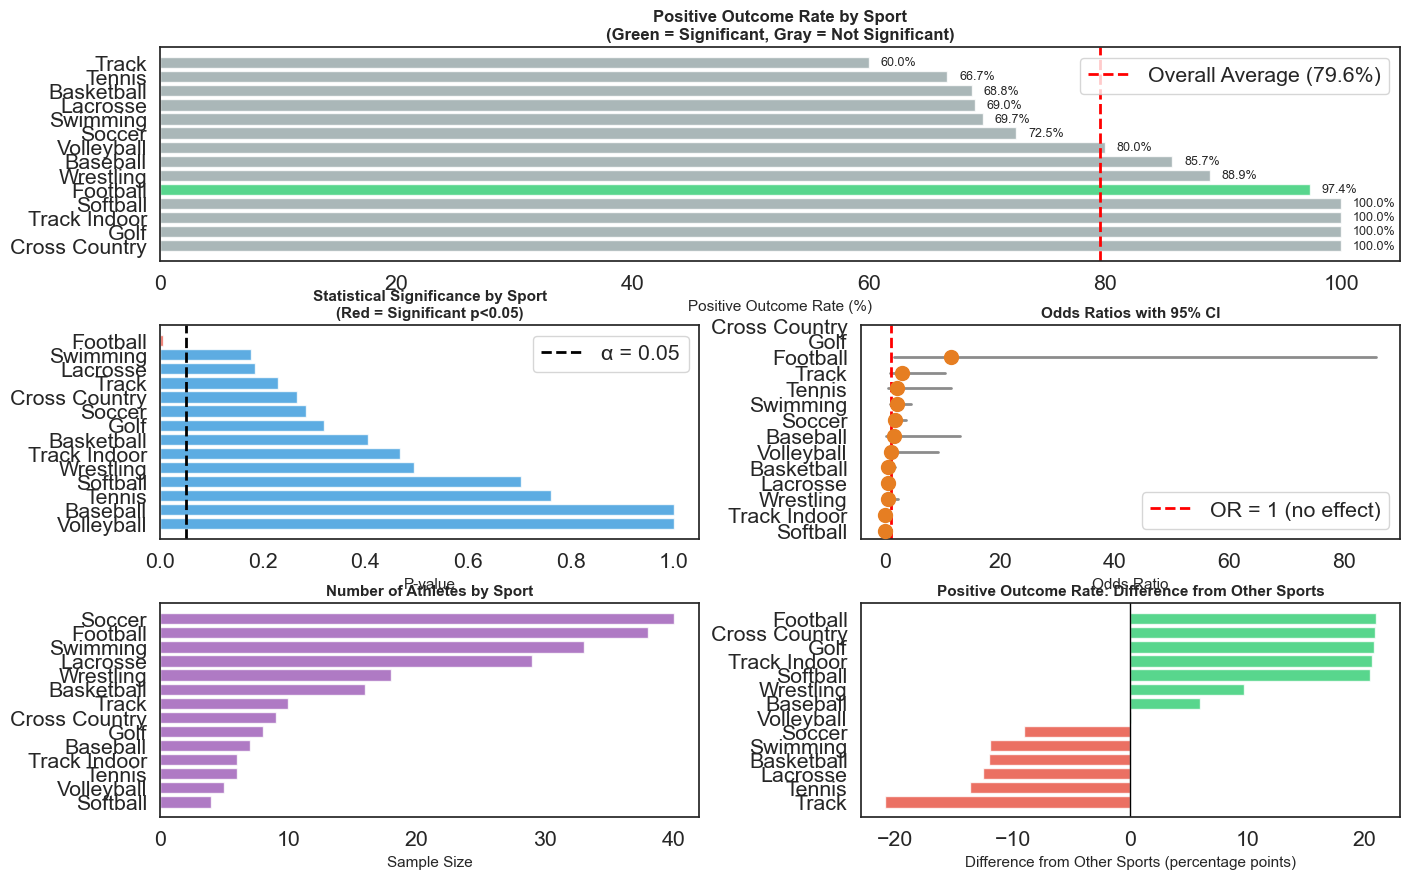



FINAL CONCLUSIONS

📊 Overall Analysis:
   - Total athletes analyzed: 229
   - Number of sports: 14
   - Overall chi-square p-value: 0.022409
   ✓ Overall: Sport type IS significantly associated with outcomes

🎯 Individual Sport Findings:
   - Sports with significant associations (p < 0.05): 1

   Top performing sports (vs others):
     • Football: +20.9 percentage points (p=0.0065)

Analysis Complete!


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, fisher_exact, chi2
import warnings

warnings.filterwarnings('ignore')

# Assuming your dataframe is named 'df'
# df = pd.read_csv('your_data.csv')

print("=" * 80)
print("SPORT-SPECIFIC OUTCOME SIGNIFICANCE ANALYSIS")
print("Research Question: Do specific sports affect likelihood of positive outcomes?")
print("=" * 80)

# ============================================================================
# 1. DATA PREPARATION
# ============================================================================
print("\n1. DATA PREPARATION")
print("-" * 80)

# Filter for Positive and Negative outcomes only
df_filtered = df[df['Outcome Category'].isin(['Positive', 'Negative'])].copy()

# Filter for athletes only (where Sport is not null/empty)
if 'Sport' not in df_filtered.columns:
    print("ERROR: 'Sport' column not found in dataset!")
    print("Available columns:", df_filtered.columns.tolist())
else:
    # Keep only athletes (those with a sport)
    athletes_df = df_filtered[df_filtered['Sport'].notna()].copy()
    athletes_df = athletes_df[athletes_df['Sport'] != ''].copy()

    print(f"Total observations (Positive/Negative outcomes): {len(df_filtered)}")
    print(f"Athletes with sport data: {len(athletes_df)}")
    print(f"Athletes excluded: {len(df_filtered) - len(athletes_df)}")

    if len(athletes_df) == 0:
        print("\nERROR: No athletes with sport data found!")
    else:
        # Create analysis dataset
        analysis_df = athletes_df[['Sport', 'Outcome Category']].copy()

        print(f"\nOutcome Category distribution (athletes only):")
        print(analysis_df['Outcome Category'].value_counts())

        print(f"\nNumber of different sports: {analysis_df['Sport'].nunique()}")
        print(f"\nSport distribution:")
        sport_counts = analysis_df['Sport'].value_counts()
        print(sport_counts)

        # ====================================================================
        # 2. OVERALL CHI-SQUARE TEST (ALL SPORTS)
        # ====================================================================
        print("\n\n2. OVERALL PEARSON'S CHI-SQUARE TEST (ALL SPORTS)")
        print("-" * 80)
        print("Null Hypothesis (H0): Sport type and outcome category are independent")
        print("Alternative Hypothesis (H1): Sport type and outcome category are related")

        # Overall contingency table
        overall_contingency = pd.crosstab(analysis_df['Sport'],
                                          analysis_df['Outcome Category'])

        print("\nContingency Table (All Sports):")
        print(overall_contingency)

        # Add totals and percentages
        print("\nWith Row Percentages:")
        overall_pct = pd.crosstab(analysis_df['Sport'],
                                  analysis_df['Outcome Category'],
                                  normalize='index') * 100
        combined_table = overall_contingency.copy()
        for col in overall_contingency.columns:
            combined_table[f'{col} %'] = overall_pct[col].round(1)
        print(combined_table)

        # Overall chi-square test
        chi2_overall, p_overall, dof_overall, expected_overall = chi2_contingency(overall_contingency)

        print(f"\nOverall Test Results:")
        print(f"  χ² Statistic: {chi2_overall:.4f}")
        print(f"  Degrees of Freedom: {dof_overall}")
        print(f"  P-value: {p_overall:.6f}")

        alpha = 0.05
        critical_value = chi2.ppf(1 - alpha, dof_overall)
        print(f"  Critical Value (α = {alpha}): {critical_value:.4f}")

        if p_overall < 0.001:
            print(f"\n  *** HIGHLY SIGNIFICANT (p < 0.001)")
            print(f"  → There IS a significant relationship between sport type and outcome")
        elif p_overall < 0.01:
            print(f"\n  ** VERY SIGNIFICANT (p < 0.01)")
            print(f"  → There IS a significant relationship between sport type and outcome")
        elif p_overall < 0.05:
            print(f"\n  * SIGNIFICANT (p < 0.05)")
            print(f"  → There IS a significant relationship between sport type and outcome")
        else:
            print(f"\n  NOT SIGNIFICANT (p ≥ 0.05)")
            print(f"  → No significant relationship between sport type and outcome")

        # Effect size
        n_overall = overall_contingency.sum().sum()
        min_dim_overall = min(overall_contingency.shape) - 1
        cramers_v_overall = np.sqrt(chi2_overall / (n_overall * min_dim_overall)) if min_dim_overall > 0 else 0
        print(f"\n  Cramér's V (Effect Size): {cramers_v_overall:.4f}")

        # ====================================================================
        # 3. INDIVIDUAL SPORT ANALYSIS
        # ====================================================================
        print("\n\n3. INDIVIDUAL SPORT ANALYSIS")
        print("-" * 80)
        print("Comparing each sport to all other sports combined\n")

        sport_results = []

        for sport in sport_counts.index:
            print(f"\n{'=' * 60}")
            print(f"SPORT: {sport}")
            print('=' * 60)

            # Create binary variable: this sport vs others
            temp_df = analysis_df.copy()
            temp_df['Sport_Binary'] = temp_df['Sport'].apply(lambda x: sport if x == sport else 'Other Sports')

            # Contingency table
            sport_contingency = pd.crosstab(temp_df['Sport_Binary'],
                                            temp_df['Outcome Category'])

            print("\nContingency Table:")
            print(sport_contingency)

            # Percentages
            sport_pct = pd.crosstab(temp_df['Sport_Binary'],
                                    temp_df['Outcome Category'],
                                    normalize='index') * 100
            print("\nPercentage Distribution:")
            print(sport_pct.round(2))

            # Extract values
            n_sport = len(temp_df[temp_df['Sport'] == sport])
            n_positive_sport = len(temp_df[(temp_df['Sport'] == sport) &
                                           (temp_df['Outcome Category'] == 'Positive')])
            pct_positive_sport = (n_positive_sport / n_sport * 100) if n_sport > 0 else 0

            n_other = len(temp_df[temp_df['Sport'] != sport])
            n_positive_other = len(temp_df[(temp_df['Sport'] != sport) &
                                           (temp_df['Outcome Category'] == 'Positive')])
            pct_positive_other = (n_positive_other / n_other * 100) if n_other > 0 else 0

            print(f"\n{sport}:")
            print(f"  - Sample size: {n_sport}")
            print(f"  - Positive outcomes: {n_positive_sport} ({pct_positive_sport:.1f}%)")
            print(f"\nOther Sports:")
            print(f"  - Sample size: {n_other}")
            print(f"  - Positive outcomes: {n_positive_other} ({pct_positive_other:.1f}%)")

            # Chi-square test
            if sport_contingency.shape == (2, 2):
                chi2_stat, p_val, dof, expected = chi2_contingency(sport_contingency)

                print(f"\nPearson's Chi-Square Test:")
                print(f"  χ² = {chi2_stat:.4f}")
                print(f"  df = {dof}")
                print(f"  p-value = {p_val:.6f}")

                # Check assumptions
                min_expected = expected.min()
                if min_expected >= 5:
                    test_valid = "Valid"
                    print(f"  Min expected frequency: {min_expected:.2f} ✓")
                else:
                    test_valid = "Use Fisher's"
                    print(f"  Min expected frequency: {min_expected:.2f} ⚠")

                # Effect size
                n = sport_contingency.sum().sum()
                cramers_v = np.sqrt(chi2_stat / n) if n > 0 else 0

                # Odds Ratio and Relative Risk
                try:
                    a = sport_contingency.iloc[0, 1]  # Sport, Positive
                    b = sport_contingency.iloc[0, 0]  # Sport, Negative
                    c = sport_contingency.iloc[1, 1]  # Other, Positive
                    d = sport_contingency.iloc[1, 0]  # Other, Negative

                    odds_ratio = (a * d) / (b * c) if (b * c) > 0 else np.inf

                    risk_sport = a / (a + b) if (a + b) > 0 else 0
                    risk_other = c / (c + d) if (c + d) > 0 else 0
                    relative_risk = risk_sport / risk_other if risk_other > 0 else np.inf

                    # Confidence intervals for OR
                    if odds_ratio != np.inf and odds_ratio > 0:
                        log_or = np.log(odds_ratio)
                        se_log_or = np.sqrt(1 / a + 1 / b + 1 / c + 1 / d)
                        or_ci_lower = np.exp(log_or - 1.96 * se_log_or)
                        or_ci_upper = np.exp(log_or + 1.96 * se_log_or)
                    else:
                        or_ci_lower, or_ci_upper = np.nan, np.nan

                    print(f"\n  Odds Ratio: {odds_ratio:.4f}")
                    if not np.isnan(or_ci_lower):
                        print(f"    95% CI: [{or_ci_lower:.4f}, {or_ci_upper:.4f}]")
                    print(f"  Relative Risk: {relative_risk:.4f}")
                    print(f"  Cramér's V: {cramers_v:.4f}")

                except Exception as e:
                    odds_ratio = np.nan
                    relative_risk = np.nan
                    or_ci_lower, or_ci_upper = np.nan, np.nan

                # Fisher's Exact Test
                try:
                    fisher_odds, fisher_p = fisher_exact(sport_contingency)
                    print(f"\nFisher's Exact Test:")
                    print(f"  p-value = {fisher_p:.6f}")
                    fisher_sig = "Yes" if fisher_p < 0.05 else "No"
                except:
                    fisher_p = np.nan
                    fisher_sig = "N/A"

                # Significance
                if p_val < 0.05:
                    significance = "SIGNIFICANT"
                    sig_symbol = "*"
                    if p_val < 0.01:
                        sig_symbol = "**"
                    if p_val < 0.001:
                        sig_symbol = "***"
                else:
                    significance = "Not Significant"
                    sig_symbol = ""

                print(f"\n  Result: {significance} {sig_symbol}")

                # Store results
                sport_results.append({
                    'Sport': sport,
                    'N': n_sport,
                    'Positive_N': n_positive_sport,
                    'Positive_Pct': pct_positive_sport,
                    'Other_Positive_Pct': pct_positive_other,
                    'Difference': pct_positive_sport - pct_positive_other,
                    'Chi2': chi2_stat,
                    'P_value': p_val,
                    'Fisher_P': fisher_p,
                    'Significant': significance,
                    'Odds_Ratio': odds_ratio,
                    'OR_CI_Lower': or_ci_lower,
                    'OR_CI_Upper': or_ci_upper,
                    'Relative_Risk': relative_risk,
                    'Cramers_V': cramers_v,
                    'Test_Valid': test_valid
                })

        # ====================================================================
        # 4. SUMMARY TABLE
        # ====================================================================
        print("\n\n4. SUMMARY TABLE - ALL SPORTS")
        print("=" * 80)

        results_df = pd.DataFrame(sport_results)
        results_df = results_df.sort_values('P_value')

        print("\nSorted by P-value (most significant first):")
        display_cols = ['Sport', 'N', 'Positive_Pct', 'Other_Positive_Pct',
                        'Difference', 'P_value', 'Odds_Ratio', 'Significant']
        print(results_df[display_cols].to_string(index=False))

        # Significant sports
        sig_sports = results_df[results_df['P_value'] < 0.05]
        if len(sig_sports) > 0:
            print(f"\n\n🎯 SPORTS WITH SIGNIFICANT ASSOCIATIONS (p < 0.05):")
            print("-" * 60)
            for idx, row in sig_sports.iterrows():
                direction = "HIGHER" if row['Difference'] > 0 else "LOWER"
                print(f"\n  {row['Sport']}:")
                print(f"    - Positive outcome rate: {row['Positive_Pct']:.1f}%")
                print(f"    - Other sports rate: {row['Other_Positive_Pct']:.1f}%")
                print(f"    - Difference: {abs(row['Difference']):.1f} percentage points {direction}")
                print(f"    - Odds Ratio: {row['Odds_Ratio']:.2f}")
                print(f"    - P-value: {row['P_value']:.6f}")
        else:
            print(f"\n\n❌ No individual sports showed significant associations (p < 0.05)")

        # ====================================================================
        # 5. VISUALIZATIONS
        # ====================================================================
        print("\n\n5. GENERATING VISUALIZATIONS")
        print("-" * 80)

        fig = plt.figure(figsize=(16, 10))
        gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

        # Plot 1: Positive outcome rate by sport
        ax1 = fig.add_subplot(gs[0, :])
        results_sorted = results_df.sort_values('Positive_Pct', ascending=False)
        colors = ['#2ecc71' if p < 0.05 else '#95a5a6' for p in results_sorted['P_value']]
        bars = ax1.barh(range(len(results_sorted)), results_sorted['Positive_Pct'], color=colors, alpha=0.8)
        ax1.set_yticks(range(len(results_sorted)))
        ax1.set_yticklabels(results_sorted['Sport'])
        ax1.set_xlabel('Positive Outcome Rate (%)', fontsize=11)
        ax1.set_title('Positive Outcome Rate by Sport\n(Green = Significant, Gray = Not Significant)',
                      fontsize=12, fontweight='bold')
        ax1.axvline(x=pct_positive_other, color='red', linestyle='--', linewidth=2,
                    label=f'Overall Average ({pct_positive_other:.1f}%)')
        ax1.legend()

        # Add value labels
        for i, (bar, val) in enumerate(zip(bars, results_sorted['Positive_Pct'])):
            ax1.text(val + 1, bar.get_y() + bar.get_height() / 2, f'{val:.1f}%',
                     va='center', fontsize=9)

        # Plot 2: P-values
        ax2 = fig.add_subplot(gs[1, 0])
        results_sorted_p = results_df.sort_values('P_value')
        colors_p = ['#e74c3c' if p < 0.05 else '#3498db' for p in results_sorted_p['P_value']]
        ax2.barh(range(len(results_sorted_p)), results_sorted_p['P_value'], color=colors_p, alpha=0.8)
        ax2.set_yticks(range(len(results_sorted_p)))
        ax2.set_yticklabels(results_sorted_p['Sport'])
        ax2.set_xlabel('P-value', fontsize=11)
        ax2.set_title('Statistical Significance by Sport\n(Red = Significant p<0.05)',
                      fontsize=11, fontweight='bold')
        ax2.axvline(x=0.05, color='black', linestyle='--', linewidth=2, label='α = 0.05')
        ax2.legend()
        ax2.invert_yaxis()

        # Plot 3: Odds Ratios with CI
        ax3 = fig.add_subplot(gs[1, 1])
        results_sorted_or = results_df.sort_values('Odds_Ratio', ascending=False)
        results_sorted_or = results_sorted_or[~results_sorted_or['Odds_Ratio'].isna()]

        y_pos = range(len(results_sorted_or))
        ax3.scatter(results_sorted_or['Odds_Ratio'], y_pos, s=100, color='#e67e22', zorder=3)

        # Add confidence intervals
        for i, (idx, row) in enumerate(results_sorted_or.iterrows()):
            if not np.isnan(row['OR_CI_Lower']) and not np.isnan(row['OR_CI_Upper']):
                ax3.plot([row['OR_CI_Lower'], row['OR_CI_Upper']], [i, i],
                         'k-', linewidth=2, alpha=0.5)

        ax3.set_yticks(y_pos)
        ax3.set_yticklabels(results_sorted_or['Sport'])
        ax3.set_xlabel('Odds Ratio', fontsize=11)
        ax3.set_title('Odds Ratios with 95% CI', fontsize=11, fontweight='bold')
        ax3.axvline(x=1, color='red', linestyle='--', linewidth=2, label='OR = 1 (no effect)')
        ax3.legend()
        ax3.invert_yaxis()

        # Plot 4: Sample sizes
        ax4 = fig.add_subplot(gs[2, 0])
        results_sorted_n = results_df.sort_values('N', ascending=False)
        ax4.barh(range(len(results_sorted_n)), results_sorted_n['N'], color='#9b59b6', alpha=0.8)
        ax4.set_yticks(range(len(results_sorted_n)))
        ax4.set_yticklabels(results_sorted_n['Sport'])
        ax4.set_xlabel('Sample Size', fontsize=11)
        ax4.set_title('Number of Athletes by Sport', fontsize=11, fontweight='bold')
        ax4.invert_yaxis()

        # Plot 5: Difference from average
        ax5 = fig.add_subplot(gs[2, 1])
        results_sorted_diff = results_df.sort_values('Difference', ascending=False)
        colors_diff = ['#2ecc71' if d > 0 else '#e74c3c' for d in results_sorted_diff['Difference']]
        ax5.barh(range(len(results_sorted_diff)), results_sorted_diff['Difference'],
                 color=colors_diff, alpha=0.8)
        ax5.set_yticks(range(len(results_sorted_diff)))
        ax5.set_yticklabels(results_sorted_diff['Sport'])
        ax5.set_xlabel('Difference from Other Sports (percentage points)', fontsize=11)
        ax5.set_title('Positive Outcome Rate: Difference from Other Sports',
                      fontsize=11, fontweight='bold')
        ax5.axvline(x=0, color='black', linestyle='-', linewidth=1)
        ax5.invert_yaxis()

        plt.savefig('sport_specific_significance_analysis.png', dpi=300, bbox_inches='tight')
        print("✅ Visualizations saved as 'sport_specific_significance_analysis.png'")
        plt.show()

        # ====================================================================
        # 6. FINAL CONCLUSIONS
        # ====================================================================
        print("\n\n" + "=" * 80)
        print("FINAL CONCLUSIONS")
        print("=" * 80)

        print(f"\n📊 Overall Analysis:")
        print(f"   - Total athletes analyzed: {len(analysis_df)}")
        print(f"   - Number of sports: {len(sport_counts)}")
        print(f"   - Overall chi-square p-value: {p_overall:.6f}")

        if p_overall < 0.05:
            print(f"   ✓ Overall: Sport type IS significantly associated with outcomes")
        else:
            print(f"   ✗ Overall: Sport type is NOT significantly associated with outcomes")

        print(f"\n🎯 Individual Sport Findings:")
        print(f"   - Sports with significant associations (p < 0.05): {len(sig_sports)}")

        if len(sig_sports) > 0:
            print(f"\n   Top performing sports (vs others):")
            for idx, row in sig_sports.head(3).iterrows():
                if row['Difference'] > 0:
                    print(f"     • {row['Sport']}: +{row['Difference']:.1f} percentage points (p={row['P_value']:.4f})")

        print("\n" + "=" * 80)
        print("Analysis Complete!")
        print("=" * 80)

RESIDENCY STATUS IMPACT ON POSITIVE OUTCOMES
Research Question: Does residency status affect outcome category?

1. DATA PREPARATION
--------------------------------------------------------------------------------
Total observations: 1635

Residency Status distribution:
RESIDENCY
Resident              1248
Out of State           231
International          107
Permanent Resident      32
Undeclared              17
Name: count, dtype: int64

Number of residency categories: 5

Outcome Category distribution:
Outcome Category
Positive    1320
Negative     315
Name: count, dtype: int64


2. DESCRIPTIVE STATISTICS
--------------------------------------------------------------------------------

Contingency Table (Counts):
Outcome Category    Negative  Positive
RESIDENCY                             
International             26        81
Out of State              48       183
Permanent Resident         4        28
Resident                 233      1015
Undeclared                 4        13

Con

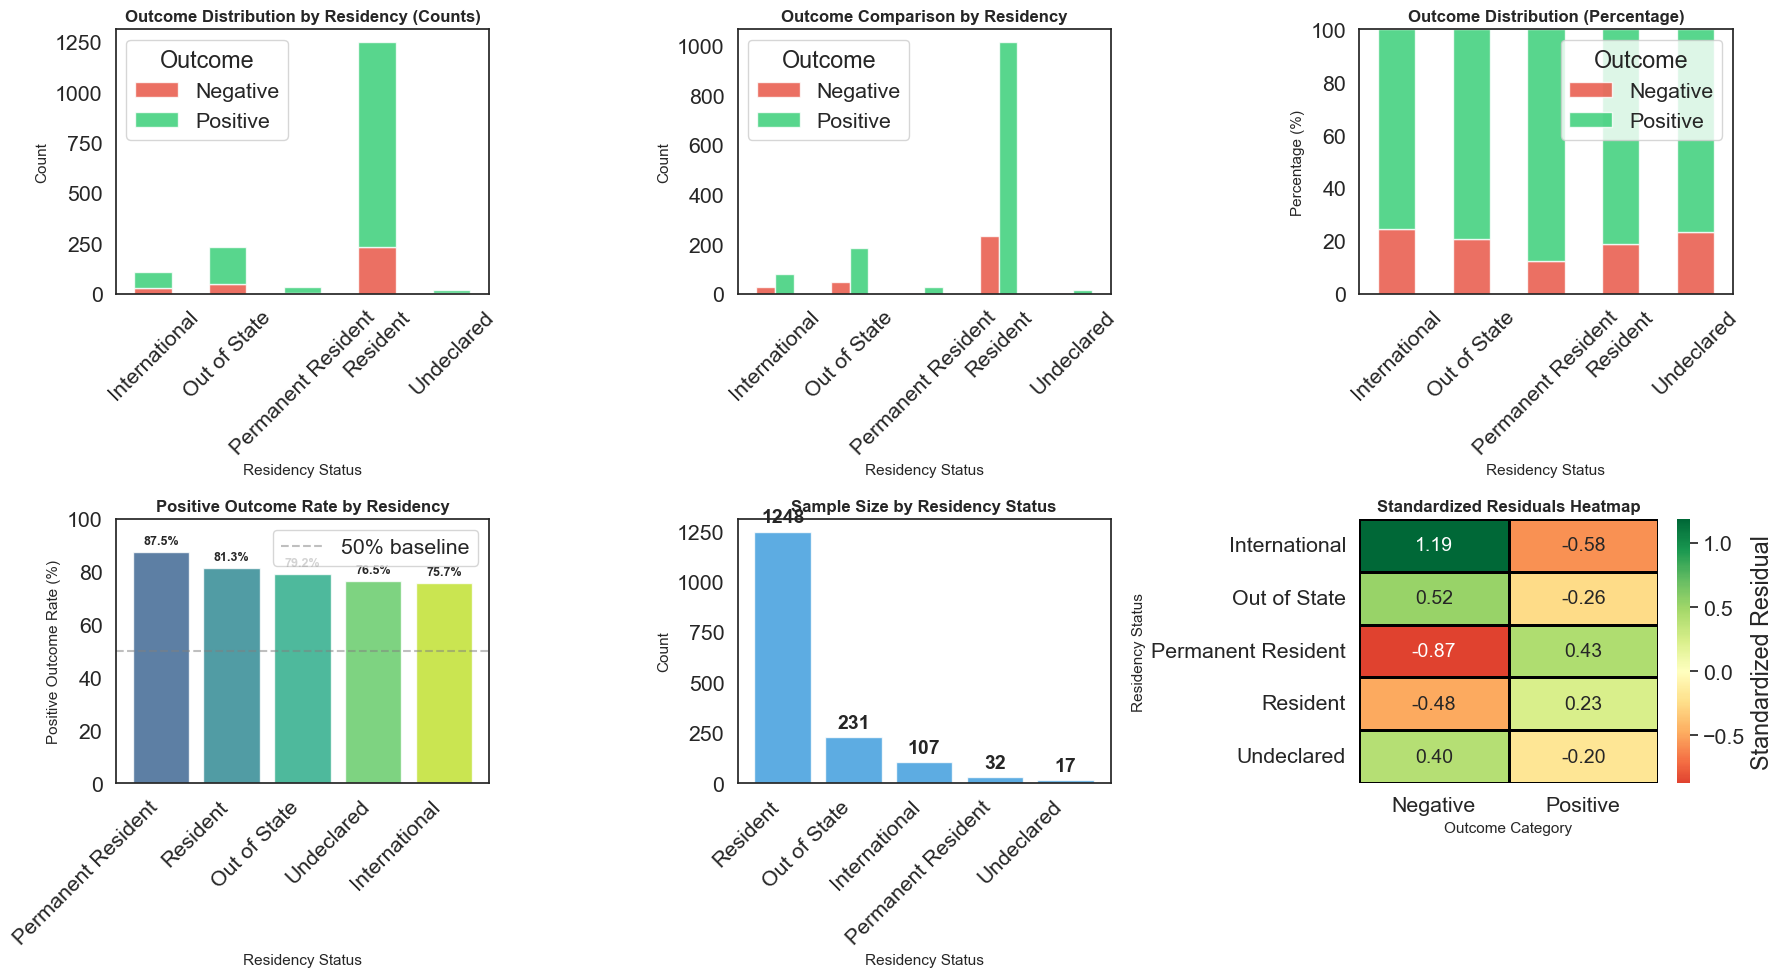



FINAL SUMMARY AND CONCLUSION

📊 Sample Characteristics:
   - Total observations: 1635
   - Number of residency categories: 5
   - Residency categories: Resident, Out of State, International, Permanent Resident, Undeclared

📈 Statistical Test Results:
   - Chi-square statistic (χ²): 3.5083
   - Degrees of freedom: 4
   - P-value: 0.476620
   - Effect size (Cramér's V): 0.0463 (NEGLIGIBLE (< 0.07))
   - Test validity: Acceptable

🎯 Statistical Conclusion:
   ✗ There is NO statistically significant relationship between
     residency status and outcome category (p = 0.476620)
   → We cannot conclude that residency status affects outcomes

💡 Key Findings:
   - Highest positive outcome rate: Permanent Resident (87.5%)
   - Lowest positive outcome rate: International (75.7%)
   - Difference: 11.8 percentage points

Analysis Complete!


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, fisher_exact, chi2
import warnings

warnings.filterwarnings('ignore')

# Assuming your dataframe is named 'df'
# df = pd.read_csv('your_data.csv')

print("=" * 80)
print("RESIDENCY STATUS IMPACT ON POSITIVE OUTCOMES")
print("Research Question: Does residency status affect outcome category?")
print("=" * 80)

# ============================================================================
# 1. DATA PREPARATION
# ============================================================================
print("\n1. DATA PREPARATION")
print("-" * 80)

# Filter for Positive and Negative outcomes only
df_filtered = df[df['Outcome Category'].isin(['Positive', 'Negative'])].copy()

# Check if RESIDENCY column exists
if 'RESIDENCY' not in df_filtered.columns:
    print("ERROR: 'RESIDENCY' column not found in dataset!")
    print("Available columns:", df_filtered.columns.tolist())
else:
    # Create analysis dataset
    analysis_df = df_filtered[['RESIDENCY', 'Outcome Category']].copy()

    # Remove missing values
    analysis_df = analysis_df.dropna()

    print(f"Total observations: {len(analysis_df)}")
    print(f"\nResidency Status distribution:")
    residency_counts = analysis_df['RESIDENCY'].value_counts()
    print(residency_counts)
    print(f"\nNumber of residency categories: {analysis_df['RESIDENCY'].nunique()}")

    print(f"\nOutcome Category distribution:")
    print(analysis_df['Outcome Category'].value_counts())

    # ========================================================================
    # 2. DESCRIPTIVE STATISTICS
    # ========================================================================
    print("\n\n2. DESCRIPTIVE STATISTICS")
    print("-" * 80)

    # Contingency table (counts)
    contingency = pd.crosstab(analysis_df['RESIDENCY'],
                              analysis_df['Outcome Category'])

    print("\nContingency Table (Counts):")
    print(contingency)
    print()

    # Add totals
    contingency_totals = pd.crosstab(analysis_df['RESIDENCY'],
                                     analysis_df['Outcome Category'],
                                     margins=True)
    print("Contingency Table with Totals:")
    print(contingency_totals)
    print()

    # Percentage by row (by residency status)
    pct_by_residency = pd.crosstab(analysis_df['RESIDENCY'],
                                   analysis_df['Outcome Category'],
                                   normalize='index') * 100

    print("Percentage Distribution (by Residency Status):")
    print(pct_by_residency.round(2))
    print()

    # Detailed summary by residency group
    print("Detailed Summary by Residency Status:")
    for residency_status in sorted(analysis_df['RESIDENCY'].unique()):
        subset = analysis_df[analysis_df['RESIDENCY'] == residency_status]
        n = len(subset)
        n_positive = len(subset[subset['Outcome Category'] == 'Positive'])
        n_negative = n - n_positive
        pct_positive = (n_positive / n) * 100 if n > 0 else 0
        pct_negative = (n_negative / n) * 100 if n > 0 else 0

        print(f"\n  {residency_status} (n={n}):")
        print(f"    - Positive outcomes: {n_positive} ({pct_positive:.2f}%)")
        print(f"    - Negative outcomes: {n_negative} ({pct_negative:.2f}%)")

    # ========================================================================
    # 3. PEARSON'S CHI-SQUARE TEST OF INDEPENDENCE
    # ========================================================================
    print("\n\n3. PEARSON'S CHI-SQUARE TEST OF INDEPENDENCE")
    print("-" * 80)
    print("Null Hypothesis (H0): Residency status and outcome category are independent")
    print("Alternative Hypothesis (H1): Residency status and outcome category are related")
    print("\nTest Type: Pearson's Chi-Square Test")

    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency)

    print(f"\nTest Statistic (χ²): {chi2_stat:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"P-value: {p_value:.6f}")

    # Critical value
    alpha = 0.05
    critical_value = chi2.ppf(1 - alpha, dof)
    print(f"Critical Value (α = {alpha}): {critical_value:.4f}")

    print("\n" + "-" * 40)
    print("OBSERVED FREQUENCIES:")
    print(contingency)

    print("\nEXPECTED FREQUENCIES (if H0 is true):")
    expected_df = pd.DataFrame(expected_freq,
                               index=contingency.index,
                               columns=contingency.columns)
    print(expected_df.round(2))

    # Calculate residuals
    print("\nSTANDARDIZED RESIDUALS:")
    print("(Shows which cells contribute most to chi-square)")
    residuals = (contingency - expected_freq) / np.sqrt(expected_freq)
    residuals_df = pd.DataFrame(residuals,
                                index=contingency.index,
                                columns=contingency.columns)
    print(residuals_df.round(3))
    print("\nNote: |residual| > 2 indicates significant deviation from expected")

    # Contribution to chi-square
    print("\nCONTRIBUTION TO CHI-SQUARE STATISTIC:")
    contributions = ((contingency - expected_freq) ** 2) / expected_freq
    contributions_df = pd.DataFrame(contributions,
                                    index=contingency.index,
                                    columns=contingency.columns)
    print(contributions_df.round(4))
    print(f"Sum of contributions: {contributions.sum().sum():.4f} (= χ² statistic)")

    # Identify major contributors
    print("\nMajor Contributors to Chi-Square (contribution > 1.0):")
    for idx in contributions_df.index:
        for col in contributions_df.columns:
            if contributions_df.loc[idx, col] > 1.0:
                print(f"  - {idx}, {col}: {contributions_df.loc[idx, col]:.4f}")

    # Check assumptions
    print("\n" + "-" * 40)
    print("ASSUMPTION CHECK FOR PEARSON'S CHI-SQUARE:")
    min_expected = expected_freq.min()
    n_below_5 = (expected_freq < 5).sum()
    n_below_1 = (expected_freq < 1).sum()

    print(f"  - Sample size: {len(analysis_df)} observations")
    print(f"  - Minimum expected frequency: {min_expected:.2f}")
    print(f"  - Cells with expected frequency < 5: {n_below_5}")
    print(f"  - Cells with expected frequency < 1: {n_below_1}")

    if min_expected >= 5:
        print("  ✓ Pearson's Chi-square test is APPROPRIATE")
        print("    (All expected frequencies ≥ 5)")
        test_validity = "Valid"
    elif min_expected >= 1 and n_below_5 <= 0.2 * expected_freq.size:
        print("  ⚠ Pearson's Chi-square test is ACCEPTABLE")
        print("    (No expected frequencies < 1, and < 20% of cells < 5)")
        test_validity = "Acceptable"
    else:
        print("  ✗ Pearson's Chi-square test assumptions VIOLATED")
        print("    → Results should be interpreted with caution")
        test_validity = "Violated"

    # Interpretation of test statistic
    print("\n" + "-" * 40)
    print("TEST STATISTIC INTERPRETATION:")
    if chi2_stat > critical_value:
        print(f"  χ² = {chi2_stat:.4f} > {critical_value:.4f} (critical value)")
        print(f"  → Test statistic falls in rejection region")
    else:
        print(f"  χ² = {chi2_stat:.4f} ≤ {critical_value:.4f} (critical value)")
        print(f"  → Test statistic does not fall in rejection region")

    # P-value interpretation
    print("\n" + "-" * 40)
    print("STATISTICAL SIGNIFICANCE (P-VALUE):")

    if p_value < 0.001:
        sig_level = "*** HIGHLY SIGNIFICANT (p < 0.001)"
        decision = f"REJECT H0 at α = {alpha}"
        conclusion = "Very strong evidence that residency status is associated with outcome category"
    elif p_value < 0.01:
        sig_level = "** VERY SIGNIFICANT (p < 0.01)"
        decision = f"REJECT H0 at α = {alpha}"
        conclusion = "Strong evidence that residency status is associated with outcome category"
    elif p_value < 0.05:
        sig_level = "* SIGNIFICANT (p < 0.05)"
        decision = f"REJECT H0 at α = {alpha}"
        conclusion = "Evidence that residency status is associated with outcome category"
    else:
        sig_level = "NOT SIGNIFICANT (p ≥ 0.05)"
        decision = f"FAIL TO REJECT H0 at α = {alpha}"
        conclusion = "Insufficient evidence that residency status affects outcome category"

    print(f"  Significance: {sig_level}")
    print(f"  Decision: {decision}")
    print(f"  Conclusion: {conclusion}")

    # ========================================================================
    # 4. EFFECT SIZE (CRAMÉR'S V)
    # ========================================================================
    print("\n\n4. EFFECT SIZE ANALYSIS")
    print("-" * 80)

    n = contingency.sum().sum()
    min_dim = min(contingency.shape) - 1
    cramers_v = np.sqrt(chi2_stat / (n * min_dim)) if min_dim > 0 else 0

    print(f"Cramér's V: {cramers_v:.4f}")
    print(f"\nInterpretation (Cohen's guidelines for df = {dof}):")
    if dof == 1:
        if cramers_v < 0.1:
            effect_interpretation = "NEGLIGIBLE (< 0.1)"
        elif cramers_v < 0.3:
            effect_interpretation = "SMALL (0.1 - 0.3)"
        elif cramers_v < 0.5:
            effect_interpretation = "MEDIUM (0.3 - 0.5)"
        else:
            effect_interpretation = "LARGE (≥ 0.5)"
    else:
        if cramers_v < 0.07:
            effect_interpretation = "NEGLIGIBLE (< 0.07)"
        elif cramers_v < 0.21:
            effect_interpretation = "SMALL (0.07 - 0.21)"
        elif cramers_v < 0.35:
            effect_interpretation = "MEDIUM (0.21 - 0.35)"
        else:
            effect_interpretation = "LARGE (≥ 0.35)"

    print(f"  Effect Size: {effect_interpretation}")

    # ========================================================================
    # 5. PAIRWISE COMPARISONS (if more than 2 residency categories)
    # ========================================================================
    if len(residency_counts) > 2:
        print("\n\n5. PAIRWISE COMPARISONS BETWEEN RESIDENCY GROUPS")
        print("-" * 80)
        print("Comparing each pair of residency statuses\n")

        from itertools import combinations

        residency_list = sorted(analysis_df['RESIDENCY'].unique())
        pairwise_results = []

        for res1, res2 in combinations(residency_list, 2):
            print(f"\n{res1} vs {res2}:")
            print("-" * 40)

            # Filter for these two groups
            pair_df = analysis_df[analysis_df['RESIDENCY'].isin([res1, res2])]
            pair_contingency = pd.crosstab(pair_df['RESIDENCY'],
                                           pair_df['Outcome Category'])

            print(pair_contingency)

            # Chi-square test
            chi2_pair, p_pair, dof_pair, expected_pair = chi2_contingency(pair_contingency)

            print(f"\nχ² = {chi2_pair:.4f}, p = {p_pair:.6f}")

            # Fisher's exact test (if 2x2)
            if pair_contingency.shape == (2, 2):
                fisher_odds, fisher_p = fisher_exact(pair_contingency)
                print(f"Fisher's Exact p = {fisher_p:.6f}")

                # Odds ratio
                try:
                    a = pair_contingency.iloc[0, 1]  # Group 1, Positive
                    b = pair_contingency.iloc[0, 0]  # Group 1, Negative
                    c = pair_contingency.iloc[1, 1]  # Group 2, Positive
                    d = pair_contingency.iloc[1, 0]  # Group 2, Negative

                    odds_ratio = (a * d) / (b * c) if (b * c) > 0 else np.inf
                    print(f"Odds Ratio: {odds_ratio:.4f}")

                    # Percentage comparison
                    pct1 = a / (a + b) * 100
                    pct2 = c / (c + d) * 100
                    print(f"{res1} positive rate: {pct1:.1f}%")
                    print(f"{res2} positive rate: {pct2:.1f}%")
                    print(f"Difference: {abs(pct1 - pct2):.1f} percentage points")

                except:
                    odds_ratio = np.nan
                    fisher_p = np.nan
            else:
                fisher_p = np.nan
                odds_ratio = np.nan

            if p_pair < 0.05:
                print("Result: SIGNIFICANT *")
            else:
                print("Result: Not Significant")

            pairwise_results.append({
                'Comparison': f"{res1} vs {res2}",
                'Chi2': chi2_pair,
                'P_value': p_pair,
                'Fisher_P': fisher_p,
                'Odds_Ratio': odds_ratio,
                'Significant': 'Yes' if p_pair < 0.05 else 'No'
            })

        print("\n\nPairwise Comparison Summary:")
        pairwise_df = pd.DataFrame(pairwise_results)
        print(pairwise_df.to_string(index=False))

    # ========================================================================
    # 6. ODDS RATIOS (for binary residency comparison)
    # ========================================================================
    if contingency.shape == (2, 2):
        print("\n\n6. ODDS RATIO AND RELATIVE RISK")
        print("-" * 80)

        try:
            # Extract values
            col_order = contingency.columns.tolist()
            pos_idx = col_order.index('Positive')
            neg_idx = col_order.index('Negative')

            a = contingency.iloc[0, pos_idx]  # Group 1, Positive
            b = contingency.iloc[0, neg_idx]  # Group 1, Negative
            c = contingency.iloc[1, pos_idx]  # Group 2, Positive
            d = contingency.iloc[1, neg_idx]  # Group 2, Negative

            res_labels = contingency.index.tolist()

            print("2x2 Table:")
            print(f"                    Positive    Negative    Total")
            print(f"{res_labels[0]:15s}       {a:4d}        {b:4d}      {a + b:4d}")
            print(f"{res_labels[1]:15s}       {c:4d}        {d:4d}      {c + d:4d}")

            # Odds Ratio
            odds_ratio = (a * d) / (b * c) if (b * c) > 0 else np.inf

            # 95% Confidence Interval for OR
            log_or = np.log(odds_ratio)
            se_log_or = np.sqrt(1 / a + 1 / b + 1 / c + 1 / d)
            ci_lower = np.exp(log_or - 1.96 * se_log_or)
            ci_upper = np.exp(log_or + 1.96 * se_log_or)

            print(f"\nOdds Ratio: {odds_ratio:.4f}")
            print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

            if odds_ratio > 1:
                print(f"\nInterpretation: {res_labels[0]} students have {odds_ratio:.2f} times")
                print(f"                the ODDS of a Positive outcome compared to {res_labels[1]}")
            elif odds_ratio < 1:
                print(f"\nInterpretation: {res_labels[0]} students have {1 / odds_ratio:.2f} times")
                print(f"                LOWER ODDS of a Positive outcome compared to {res_labels[1]}")
            else:
                print("\nInterpretation: No difference in odds between groups")

            # Check if CI includes 1
            if ci_lower <= 1 <= ci_upper:
                print("Note: 95% CI includes 1.0 → Odds ratio is NOT statistically significant")
            else:
                print("Note: 95% CI does NOT include 1.0 → Odds ratio IS statistically significant")

            # Relative Risk
            print("\n" + "-" * 40)
            risk_group1 = a / (a + b)
            risk_group2 = c / (c + d)
            relative_risk = risk_group1 / risk_group2 if risk_group2 > 0 else np.inf

            # 95% CI for RR
            log_rr = np.log(relative_risk)
            se_log_rr = np.sqrt((1 / a - 1 / (a + b)) + (1 / c - 1 / (c + d)))
            rr_ci_lower = np.exp(log_rr - 1.96 * se_log_rr)
            rr_ci_upper = np.exp(log_rr + 1.96 * se_log_rr)

            print(f"Relative Risk: {relative_risk:.4f}")
            print(f"95% CI: [{rr_ci_lower:.4f}, {rr_ci_upper:.4f}]")

            print(f"\nRisk in {res_labels[0]}: {risk_group1 * 100:.2f}%")
            print(f"Risk in {res_labels[1]}: {risk_group2 * 100:.2f}%")

            if relative_risk > 1:
                pct_increase = (relative_risk - 1) * 100
                print(f"\nInterpretation: {res_labels[0]} students have a {pct_increase:.1f}% HIGHER")
                print(f"                rate of Positive outcomes compared to {res_labels[1]}")
            elif relative_risk < 1:
                pct_decrease = (1 - relative_risk) * 100
                print(f"\nInterpretation: {res_labels[0]} students have a {pct_decrease:.1f}% LOWER")
                print(f"                rate of Positive outcomes compared to {res_labels[1]}")

            # Risk Difference
            risk_diff = (risk_group1 - risk_group2) * 100
            print(f"\nRisk Difference: {risk_diff:.2f} percentage points")

            # Fisher's Exact Test
            fisher_odds, fisher_p = fisher_exact(contingency)
            print(f"\nFisher's Exact Test:")
            print(f"  Odds Ratio: {fisher_odds:.4f}")
            print(f"  P-value: {fisher_p:.6f}")

        except Exception as e:
            print(f"Error calculating odds ratio: {e}")

    # ========================================================================
    # 7. VISUALIZATIONS
    # ========================================================================
    print("\n\n7. GENERATING VISUALIZATIONS")
    print("-" * 80)

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    # Plot 1: Stacked bar chart (counts)
    ax1 = axes[0, 0]
    contingency.plot(kind='bar', stacked=True, ax=ax1,
                     color=['#e74c3c', '#2ecc71'], alpha=0.8)
    ax1.set_xlabel('Residency Status', fontsize=11)
    ax1.set_ylabel('Count', fontsize=11)
    ax1.set_title('Outcome Distribution by Residency (Counts)', fontsize=12, fontweight='bold')
    ax1.legend(title='Outcome', loc='upper left')
    ax1.tick_params(axis='x', rotation=45)

    # Plot 2: Grouped bar chart (counts)
    ax2 = axes[0, 1]
    contingency.plot(kind='bar', ax=ax2,
                     color=['#e74c3c', '#2ecc71'], alpha=0.8)
    ax2.set_xlabel('Residency Status', fontsize=11)
    ax2.set_ylabel('Count', fontsize=11)
    ax2.set_title('Outcome Comparison by Residency', fontsize=12, fontweight='bold')
    ax2.legend(title='Outcome')
    ax2.tick_params(axis='x', rotation=45)

    # Plot 3: Percentage stacked bar chart
    ax3 = axes[0, 2]
    pct_by_residency.plot(kind='bar', stacked=True, ax=ax3,
                          color=['#e74c3c', '#2ecc71'], alpha=0.8)
    ax3.set_xlabel('Residency Status', fontsize=11)
    ax3.set_ylabel('Percentage (%)', fontsize=11)
    ax3.set_title('Outcome Distribution (Percentage)', fontsize=12, fontweight='bold')
    ax3.legend(title='Outcome')
    ax3.tick_params(axis='x', rotation=45)
    ax3.set_ylim([0, 100])

    # Plot 4: Positive outcome rate comparison
    ax4 = axes[1, 0]
    positive_rates = pct_by_residency['Positive'].sort_values(ascending=False)
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(positive_rates)))
    bars = ax4.bar(range(len(positive_rates)), positive_rates.values,
                   color=colors, alpha=0.8)
    ax4.set_xlabel('Residency Status', fontsize=11)
    ax4.set_ylabel('Positive Outcome Rate (%)', fontsize=11)
    ax4.set_title('Positive Outcome Rate by Residency', fontsize=12, fontweight='bold')
    ax4.set_xticks(range(len(positive_rates)))
    ax4.set_xticklabels(positive_rates.index, rotation=45, ha='right')
    ax4.set_ylim([0, 100])
    ax4.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% baseline')

    # Add value labels on bars
    for bar, val in zip(bars, positive_rates.values):
        ax4.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
                 f'{val:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

    ax4.legend()

    # Plot 5: Sample size by residency
    ax5 = axes[1, 1]
    residency_counts_sorted = residency_counts.sort_values(ascending=False)
    ax5.bar(range(len(residency_counts_sorted)), residency_counts_sorted.values,
            color='#3498db', alpha=0.8)
    ax5.set_xlabel('Residency Status', fontsize=11)
    ax5.set_ylabel('Count', fontsize=11)
    ax5.set_title('Sample Size by Residency Status', fontsize=12, fontweight='bold')
    ax5.set_xticks(range(len(residency_counts_sorted)))
    ax5.set_xticklabels(residency_counts_sorted.index, rotation=45, ha='right')

    # Add value labels
    for i, val in enumerate(residency_counts_sorted.values):
        ax5.text(i, val + max(residency_counts_sorted.values) * 0.02,
                 str(val), ha='center', va='bottom', fontweight='bold')

    # Plot 6: Heatmap of standardized residuals
    ax6 = axes[1, 2]
    sns.heatmap(residuals_df, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
                cbar_kws={'label': 'Standardized Residual'}, ax=ax6,
                linewidths=1, linecolor='black')
    ax6.set_title('Standardized Residuals Heatmap', fontsize=12, fontweight='bold')
    ax6.set_xlabel('Outcome Category', fontsize=11)
    ax6.set_ylabel('Residency Status', fontsize=11)

    plt.tight_layout()
    plt.savefig('residency_outcome_analysis.png', dpi=300, bbox_inches='tight')
    print("✅ Visualizations saved as 'residency_outcome_analysis.png'")
    plt.show()

    # ========================================================================
    # 8. FINAL SUMMARY
    # ========================================================================
    print("\n\n" + "=" * 80)
    print("FINAL SUMMARY AND CONCLUSION")
    print("=" * 80)

    print(f"\n📊 Sample Characteristics:")
    print(f"   - Total observations: {len(analysis_df)}")
    print(f"   - Number of residency categories: {len(residency_counts)}")
    print(f"   - Residency categories: {', '.join(map(str, residency_counts.index.tolist()))}")

    print(f"\n📈 Statistical Test Results:")
    print(f"   - Chi-square statistic (χ²): {chi2_stat:.4f}")
    print(f"   - Degrees of freedom: {dof}")
    print(f"   - P-value: {p_value:.6f}")
    print(f"   - Effect size (Cramér's V): {cramers_v:.4f} ({effect_interpretation})")
    print(f"   - Test validity: {test_validity}")

    print(f"\n🎯 Statistical Conclusion:")
    if p_value < 0.05:
        print(f"   ✓ There IS a statistically significant relationship between")
        print(f"     residency status and outcome category (p = {p_value:.6f})")
        if cramers_v >= 0.3:
            print(f"   ✓ The effect size is {effect_interpretation.split()[0].lower()}, indicating a")
            print(f"     meaningful practical difference")
        else:
            print(f"   ⚠ However, the effect size is {effect_interpretation.split()[0].lower()},")
            print(f"     suggesting limited practical significance")
    else:
        print(f"   ✗ There is NO statistically significant relationship between")
        print(f"     residency status and outcome category (p = {p_value:.6f})")
        print(f"   → We cannot conclude that residency status affects outcomes")

    print(f"\n💡 Key Findings:")
    # Identify best and worst performing residency groups
    best_residency = positive_rates.idxmax()
    best_rate = positive_rates.max()
    worst_residency = positive_rates.idxmin()
    worst_rate = positive_rates.min()

    print(f"   - Highest positive outcome rate: {best_residency} ({best_rate:.1f}%)")
    print(f"   - Lowest positive outcome rate: {worst_residency} ({worst_rate:.1f}%)")
    print(f"   - Difference: {best_rate - worst_rate:.1f} percentage points")

    print("\n" + "=" * 80)
    print("Analysis Complete!")
    print("=" * 80)

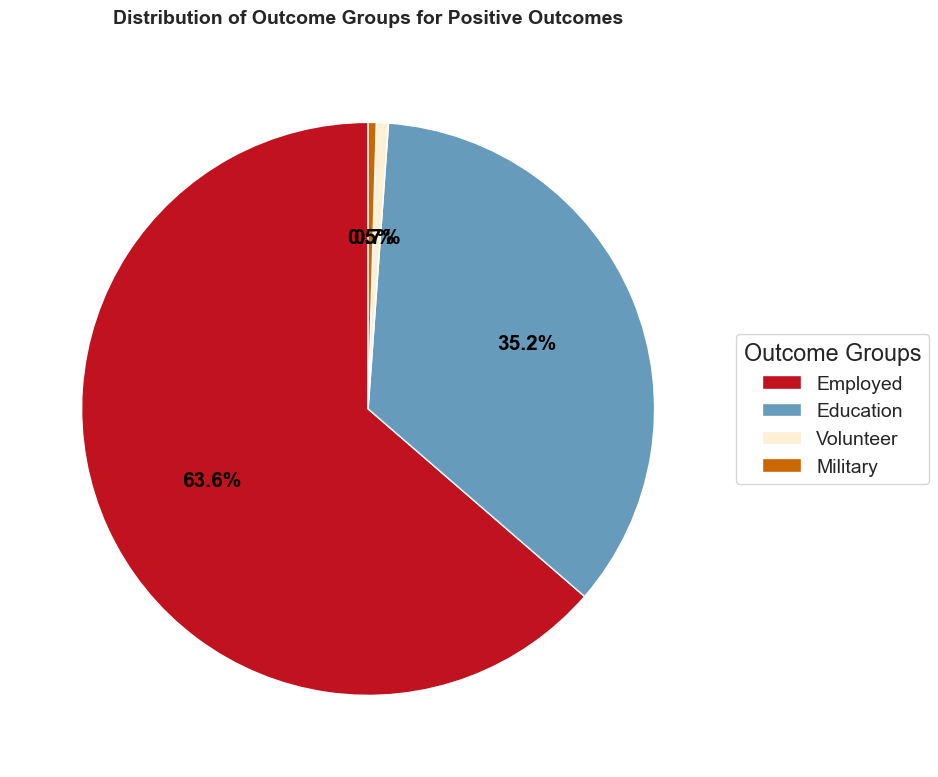

Positive outcomes analyzed: 1320

Outcome Group Distribution:
Outcome Group
Employed     840
Education    465
Volunteer      9
Military       6
Name: count, dtype: int64


In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# df = pd.read_csv('your_data.csv')

# Filter for Positive outcomes only
positive_df = df[df['Outcome Category'] == 'Positive'].copy()

# Remove missing Outcome Group values
positive_df = positive_df[positive_df['Outcome Group'].notna()].copy()
positive_df = positive_df[positive_df['Outcome Group'] != ''].copy()

# Count by outcome group
outcome_group_counts = positive_df['Outcome Group'].value_counts()

# Create pie chart with legend instead of labels
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Set3(range(len(outcome_group_counts)))

wedges, texts, autotexts = ax.pie(outcome_group_counts.values,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 11})

# Make percentage text bold and white
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(15)

# Add legend instead of labels on pie
ax.legend(wedges, outcome_group_counts.index,
          title="Outcome Groups",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=14)

plt.title('Distribution of Outcome Groups for Positive Outcomes',
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('outcome_group_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Positive outcomes analyzed: {len(positive_df)}")
print("\nOutcome Group Distribution:")
print(outcome_group_counts)

In [150]:
from rapidfuzz import fuzz
from collections import Counter


def create_employer_mapping(employer_names, threshold=90):
    """Create mapping for similar employer names using fuzzy matching."""
    company_names = employer_names.dropna().tolist()

    groups = []
    used = set()

    for i, name in enumerate(company_names):
        if i in used:
            continue

        group = [name]
        used.add(i)

        for j, other in enumerate(company_names):
            if j in used:
                continue

            # Compare similarity
            similarity = fuzz.ratio(name.lower(), other.lower())
            if similarity >= threshold or name.lower() in other.lower() or other.lower() in name.lower():
                group.append(other)
                used.add(j)

        groups.append(group)

    # Create mapping dictionary
    mapping = {}
    for group in groups:
        counts = Counter(group)
        most_common = counts.most_common(1)[0][0]
        for name in group:
            mapping[name] = most_common

    return mapping

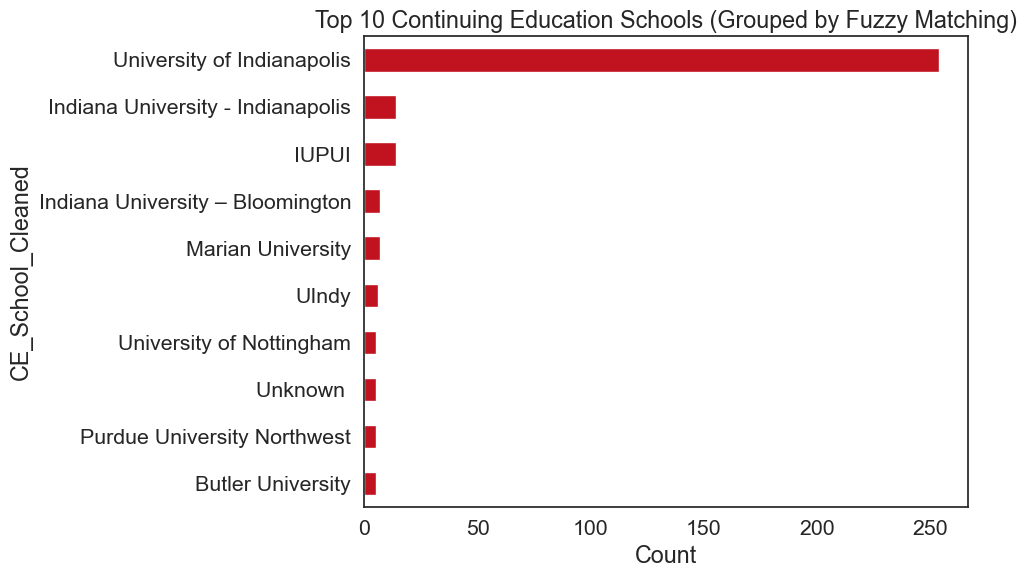

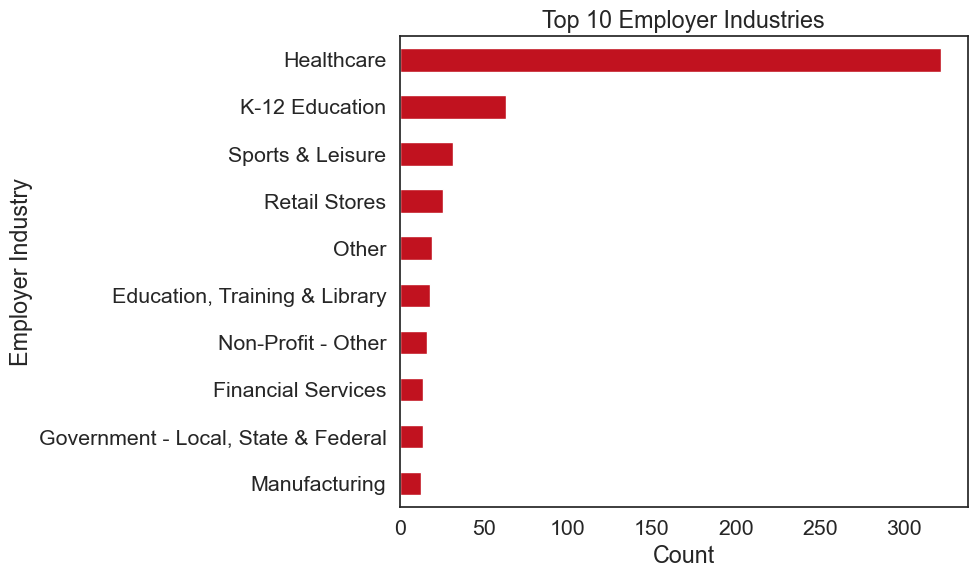

,Continuing Education Level,Count
0,Masters,219
1,Master's Degree,109
2,Doctorate,79
3,Doctoral Degree,35
4,Bachelors,21
5,Certificate,7
6,Additional Undergraduate Degree,5
7,Advanced Certificate,3
8,Non-Degree Seeking,2
9,Associates,2


In [151]:
raw_schools = df['Continuing Education School'].dropna().unique()

# Build mapping dictionary using your function
school_mapping = create_employer_mapping(pd.Series(raw_schools), threshold=90)

# Apply mapping
df['CE_School_Cleaned'] = (
    df['Continuing Education School']
    .map(school_mapping)  # replace with cleaned names
    .dropna()  # optional clean-up
)

# ---------------------------
# 2. Count top 10 cleaned schools
# ---------------------------
ce_school_counts = (
    df['CE_School_Cleaned']
    .value_counts()
    .head(10)
)

# ---------------------------
# 3. Plot
# ---------------------------
plt.figure(figsize=(10, 6))
ce_school_counts.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 Continuing Education Schools (Grouped by Fuzzy Matching)")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# ---------------------------
# 2. Employer Industry – Top 10
# ---------------------------
industry_counts = (
    df['Employer Industry']
    .dropna()
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10, 6))
industry_counts.sort_values(ascending=True).plot(kind='barh')
plt.title("Top 10 Employer Industries")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# ---------------------------
# 3. Continuing Education Level – Value Count DataFrame + Bar Plot
# ---------------------------
ce_level_counts = (
    df['Continuing Education Level']
    .dropna()
    .value_counts()
    .head(10)
)

# DataFrame
ce_level_df = ce_level_counts.rename_axis("Continuing Education Level").reset_index(name="Count")
ce_level_df

In [160]:
df['CE_School_Cleaned'].value_counts()

CE_School_Cleaned
University of Indianapolis                  254
IUPUI                                        14
Indiana University - Indianapolis            14
Marian University                             7
Indiana University – Bloomington              7
                                           ... 
Southern Illinois University‚ Carbondale      1
Columbia University                           1
University of Kansas                          1
University of Houston                         1
University of Notre Dame                      1
Name: count, Length: 121, dtype: int64